In [1]:
# import libraries
import pandas as pd
import numpy as np
import glob
import os
import shutil #used to zip predictions for submission

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

from dtwalign import dtw
from dtwalign import dtw_from_distance_matrix
from scipy.ndimage import gaussian_filter
from scipy import interpolate

# import sklearn libararies
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


np.random.seed(10)

In [8]:
files=glob.glob('./data/train/*.csv')
df = []
for i in files:
    df0=pd.read_csv(i)
    df0['well']=i.split('_')[-1].split('.')[0]
    df0['log_RD']=np.log10(df0['RD'])
    df.append(df0.copy())
df_c=pd.concat(df)

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
for idx,i in enumerate(df):
    print(f"well {i.loc[0,'well']}:")
    display(i.describe())
    display(i.head())

well 01:


DEPT      GR    RHOB    NPHI      RD  log_RD
count 8881.00 8881.00 8881.00 8881.00 8881.00 8881.00
mean  2631.00  113.68    2.49    0.28    7.35    0.80
std   1281.93   27.04    0.08    0.06   19.98    0.18
min    411.00   25.62    1.35    0.06    1.33    0.12
25%   1521.00   96.99    2.46    0.25    5.28    0.72
50%   2631.00  107.59    2.50    0.28    6.51    0.81
75%   3741.00  127.36    2.54    0.31    7.98    0.90
max   4851.00  246.98    2.77    0.67  975.64    2.99

DEPT    GR  RHOB  NPHI     RD well  log_RD
0 411.00 94.01  2.24  0.47 310.51   01    2.49
1 411.50 95.01  2.26  0.48 726.14   01    2.86
2 412.00 96.10  2.28  0.45 975.64   01    2.99
3 412.50 95.68  2.27  0.43 975.64   01    2.99
4 413.00 93.03  2.28  0.41 975.64   01    2.99

well 02:


DEPT      GR    RHOB    NPHI      RD  log_RD
count 7955.00 7955.00 7955.00 7955.00 7955.00 7955.00
mean  2383.50   96.96    2.40    0.31   27.31    0.85
std   1148.28   22.68    0.13    0.07  192.56    0.33
min    395.00   45.85    1.75    0.03    0.35   -0.46
25%   1389.25   82.98    2.35    0.27    5.38    0.73
50%   2383.50   93.29    2.44    0.33    6.87    0.84
75%   3377.75  107.27    2.49    0.35    8.45    0.93
max   4372.00  232.21    2.60    0.46 1957.67    3.29

DEPT    GR  RHOB  NPHI   RD well  log_RD
0 395.00 84.87  2.16  0.39 2.06   02    0.31
1 395.50 84.66  2.09  0.40 3.79   02    0.58
2 396.00 84.67  1.97  0.40 5.04   02    0.70
3 396.50 84.91  1.96  0.41 5.84   02    0.77
4 397.00 85.15  1.95  0.41 6.26   02    0.80

well 03:


DEPT      GR    RHOB    NPHI      RD  log_RD
count 7593.00 7593.00 7593.00 7593.00 7593.00 7593.00
mean  2371.00  109.09    2.50    0.29    7.66    0.80
std   1096.03   25.09    0.07    0.05   26.03    0.21
min    473.00    7.34    1.47    0.04    1.25    0.10
25%   1422.00   96.43    2.47    0.27    4.94    0.69
50%   2371.00  105.25    2.50    0.30    6.99    0.84
75%   3320.00  121.34    2.53    0.32    8.23    0.92
max   4269.00  238.74    2.74    0.61 1292.76    3.11

DEPT    GR  RHOB  NPHI      RD well  log_RD
0 473.00 64.50  2.30  0.33 1065.44   03    3.03
1 473.50 62.98  2.31  0.31 1214.96   03    3.08
2 474.00 62.04  2.31  0.31 1292.76   03    3.11
3 474.50 62.18  2.30  0.31  817.98   03    2.91
4 475.00 64.77  2.29  0.33  417.21   03    2.62

well 04:


DEPT      GR    RHOB    NPHI      RD  log_RD
count 3155.00 3155.00 3155.00 3155.00 3155.00 3155.00
mean  3292.00  114.00    2.50    0.20    7.62    0.79
std    455.46   35.12    0.13    0.05    5.83    0.27
min   2503.50   16.48    2.00    0.07    1.23    0.09
25%   2897.75   94.56    2.46    0.17    3.91    0.59
50%   3292.00  114.73    2.53    0.19    5.75    0.76
75%   3686.25  132.92    2.58    0.23    8.78    0.94
max   4080.50  400.00    3.05    0.46   47.94    1.68

DEPT     GR  RHOB  NPHI   RD well  log_RD
0 2503.50 124.81  2.54  0.26 5.97   04    0.78
1 2504.00 120.11  2.54  0.26 5.95   04    0.77
2 2504.50 117.00  2.54  0.26 6.10   04    0.79
3 2505.00 119.21  2.54  0.25 6.27   04    0.80
4 2505.50 121.56  2.53  0.24 6.32   04    0.80

well 05:


DEPT       GR     RHOB     NPHI       RD   log_RD
count 10345.00 10345.00 10345.00 10345.00 10345.00 10345.00
mean   3067.00   101.85     2.51     0.25   107.66     1.05
std    1493.24    32.81     0.16     0.09  1507.40     0.50
min     481.00    12.06     1.27     0.01     0.21    -0.68
25%    1774.00    88.84     2.46     0.19     6.32     0.80
50%    3067.00   104.16     2.52     0.27     8.36     0.92
75%    4360.00   118.77     2.58     0.31    16.78     1.22
max    5653.00   399.73     2.96     0.65 49851.05     4.70

DEPT    GR  RHOB  NPHI    RD well  log_RD
0 481.00 71.77  2.73  0.36  0.21   05   -0.68
1 481.50 79.11  2.59  0.34  0.27   05   -0.56
2 482.00 87.47  2.50  0.34  0.78   05   -0.11
3 482.50 91.11  2.48  0.36  4.18   05    0.62
4 483.00 92.33  2.47  0.37 10.96   05    1.04

well 06:


DEPT      GR    RHOB    NPHI      RD  log_RD
count 3521.00 3521.00 3521.00 3521.00 3521.00 3521.00
mean  3160.00  117.57    2.49    0.26    8.80    0.83
std    508.28   31.25    0.08    0.05    7.91    0.30
min   2280.00   17.83    2.00    0.09    1.34    0.13
25%   2720.00  101.02    2.45    0.23    4.22    0.63
50%   3160.00  116.86    2.51    0.26    6.25    0.80
75%   3600.00  132.66    2.54    0.29    9.68    0.99
max   4040.00  255.45    2.88    0.50   47.58    1.68

DEPT     GR  RHOB  NPHI   RD well  log_RD
0 2280.00 100.36  2.38  0.30 5.31   06    0.72
1 2280.50 100.03  2.40  0.28 5.03   06    0.70
2 2281.00  99.70  2.47  0.26 4.75   06    0.68
3 2281.50  99.01  2.50  0.25 4.47   06    0.65
4 2282.00  95.78  2.53  0.26 4.20   06    0.62

well 07:


DEPT       GR     RHOB     NPHI       RD   log_RD
count 10346.00 10346.00 10346.00 10346.00 10346.00 10346.00
mean   3156.75   101.51     2.51     0.25   114.33     1.05
std    1493.39    33.01     0.16     0.09  1590.81     0.50
min     570.50    10.99     1.27     0.01     0.31    -0.51
25%    1863.62    88.40     2.47     0.19     6.37     0.80
50%    3156.75   103.58     2.52     0.27     8.49     0.93
75%    4449.88   118.67     2.58     0.31    16.83     1.23
max    5743.00   400.00     2.96     0.66 49485.67     4.69

DEPT    GR  RHOB  NPHI   RD well  log_RD
0 570.50 78.00  2.80  0.40 0.31   07   -0.51
1 571.00 83.80  2.70  0.38 2.12   07    0.33
2 571.50 89.21  2.50  0.37 7.10   07    0.85
3 572.00 93.04  2.48  0.35 7.28   07    0.86
4 572.50 93.40  2.47  0.36 6.17   07    0.79

well 08:


DEPT      GR    RHOB    NPHI      RD  log_RD
count 7284.00 7284.00 7284.00 7284.00 7284.00 7284.00
mean  2370.75  114.12    2.49    0.29    7.99    0.84
std   1051.43   23.59    0.09    0.06    5.87    0.22
min    550.00   38.64    2.00   -0.01    1.36    0.13
25%   1460.38  100.23    2.46    0.26    5.41    0.73
50%   2370.75  110.55    2.51    0.30    7.52    0.88
75%   3281.12  124.81    2.54    0.32    8.82    0.95
max   4191.50  385.83    2.91    0.69  121.38    2.08

DEPT    GR  RHOB  NPHI   RD well  log_RD
0 550.00 92.74  2.49  0.36 7.43   08    0.87
1 550.50 94.72  2.49  0.36 7.12   08    0.85
2 551.00 95.79  2.48  0.37 7.03   08    0.85
3 551.50 94.09  2.48  0.36 7.03   08    0.85
4 552.00 91.99  2.48  0.35 6.83   08    0.83

well 09:


DEPT       GR     RHOB     NPHI       RD   log_RD
count 10224.00 10224.00 10224.00 10224.00 10224.00 10224.00
mean   3052.75    99.68     2.51     0.25    25.46     0.93
std    1475.78    32.30     0.15     0.09   120.05     0.43
min     497.00     8.43     1.43     0.01     1.03     0.01
25%    1774.88    89.35     2.47     0.18     4.94     0.69
50%    3052.75   103.65     2.52     0.27     6.94     0.84
75%    4330.62   118.19     2.58     0.31    12.07     1.08
max    5608.50   251.97     2.98     0.66  2000.00     3.30

DEPT    GR  RHOB  NPHI      RD well  log_RD
0 497.00 82.73  2.45  0.46 1195.41   09    3.08
1 497.50 88.36  2.43  0.43   67.30   09    1.83
2 498.00 88.56  2.40  0.40    2.35   09    0.37
3 498.50 88.76  2.38  0.39    1.90   09    0.28
4 499.00 90.15  2.41  0.39    7.84   09    0.89

In [42]:
def log_plot(n, df, dtop, dbot):
    """ 
    Parameters:
        n: index well number
        df : dataframe 
        dtop: top interval
        dbot: bottom interval 
    """
    
    #Figsize setting
    fig, axes = plt.subplots(figsize=(30,30))

    curve_names = ['GR', 'RD', 'RHOB', 'NPHI']
    
    #Set up the plot axes
    # ax1  = plt.subplot2grid((1,9), (0,0), rowspan=1, colspan = 1)
    # ax2  = ax1.twiny()
    ax3  = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
    # ax4  = ax3.twiny()
    ax5  = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
    ax6  = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
    ax7  = ax6.twiny()
    # ax8  = plt.subplot2grid((1,9), (0,4), rowspan=1, colspan = 1)
    # ax9  = ax8.twiny()
    
    #Plot Title
    plt.title(label='Well-'f'{n}', loc='Right', y=1.045, fontsize=18)
    
    #Set up the individual log tracks / subplots
    ax3.plot("GR", "DEPT", data = df, color = "green", lw = 1.5)
    ax3.set_xlim(0, 200) 
    ax3.spines['top'].set_edgecolor('green')

    
    ax5.plot("RD", "DEPT", data = df, color = "red", lw = 0.5)
    ax5.set_xlim(0.2, 200)
    ax5.semilogx()
    ax5.spines['top'].set_edgecolor('red')

    ax6.plot("RHOB", "DEPT", data = df, color = "red", lw = 0.5)
    ax6.set_xlim(1.95, 2.95)
    ax6.spines['top'].set_edgecolor('red')

    ax7.plot("NPHI", "DEPT", data = df, color = "blue", lw = 0.5)
    ax7.set_xlim(0.45, -0.15)
    ax7.spines['top'].set_edgecolor('blue')
    x = df.RHOB
    y = df.NPHI
    z = df.DEPT
    nx = np.array(ax6.get_xlim())
    ny = np.array(ax7.get_xlim())
    nz=((y-np.max(ny))/(np.min(ny)-np.max(ny)))*(np.max(nx)-np.min(nx))+np.min(nx)
    ax6.fill_betweenx(z, x, nz, where= x>=nz, facecolor='brown')
    ax6.fill_betweenx(z, x, nz, where= x<=nz, facecolor='yellow')

    #Set up the common elements between the subplots
    for i, ax in enumerate(fig.axes):
        ax.set_ylim(dbot, dtop) # Set the depth range
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.set_xlabel(curve_names[i])

        if i == 3:
            ax.spines["top"].set_position(("axes", 1.025))
        else:
            ax.grid()

    #Hide tick labels on the y-axis 
    plt.setp(ax6.get_yticklabels(), visible = False)
    #Reduce the space between each subplot
    fig.subplots_adjust(wspace = 0.2)

    plt.savefig(f'alligned_well{n}.png')

In [39]:
df[0]

DEPT    GR  RHOB  NPHI     RD well  log_RD
0     411.00 94.01  2.24  0.47 310.51   01    2.49
1     411.50 95.01  2.26  0.48 726.14   01    2.86
2     412.00 96.10  2.28  0.45 975.64   01    2.99
3     412.50 95.68  2.27  0.43 975.64   01    2.99
4     413.00 93.03  2.28  0.41 975.64   01    2.99
...      ...   ...   ...   ...    ...  ...     ...
8876 4849.00 85.79  2.64  0.12   8.86   01    0.95
8877 4849.50 85.89  2.65  0.12   9.76   01    0.99
8878 4850.00 87.11  2.67  0.12   9.59   01    0.98
8879 4850.50 76.15  2.69  0.12   9.22   01    0.96
8880 4851.00 55.13  2.71  0.12   8.85   01    0.95

[8881 rows x 7 columns]

C:\Users\DELL\AppData\Local\Temp\ipykernel_23176\3938136846.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3  = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


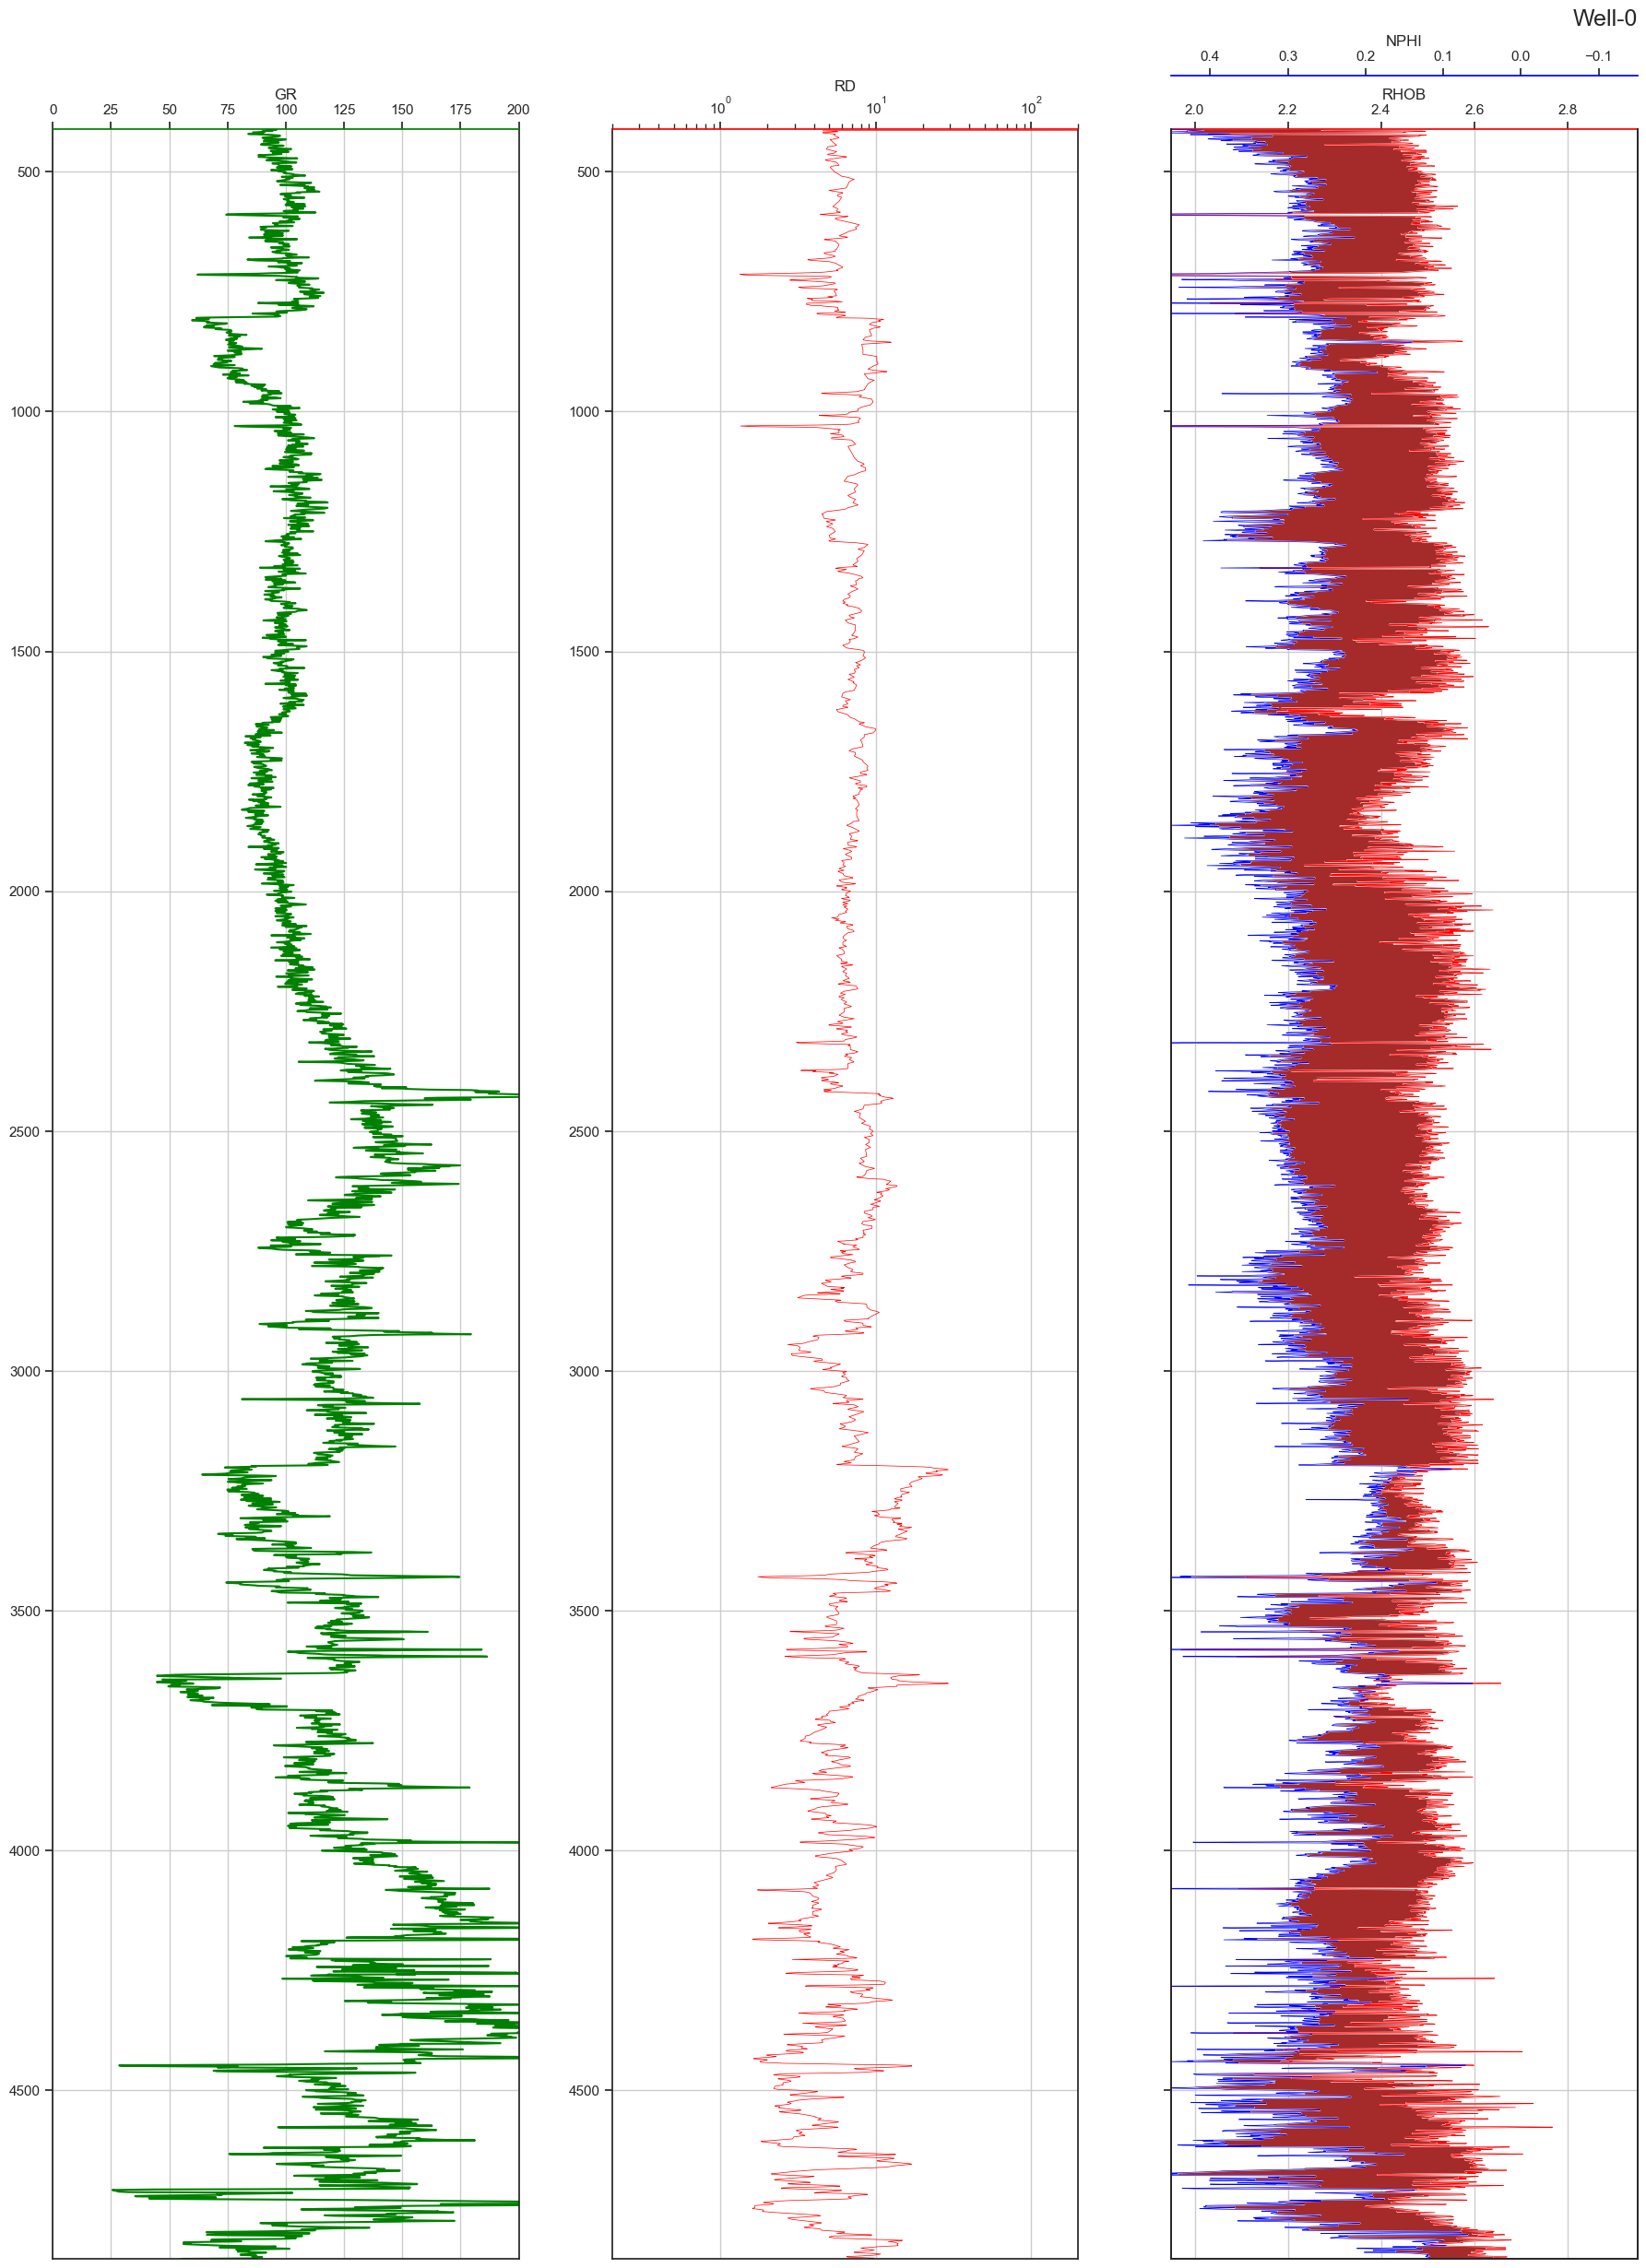

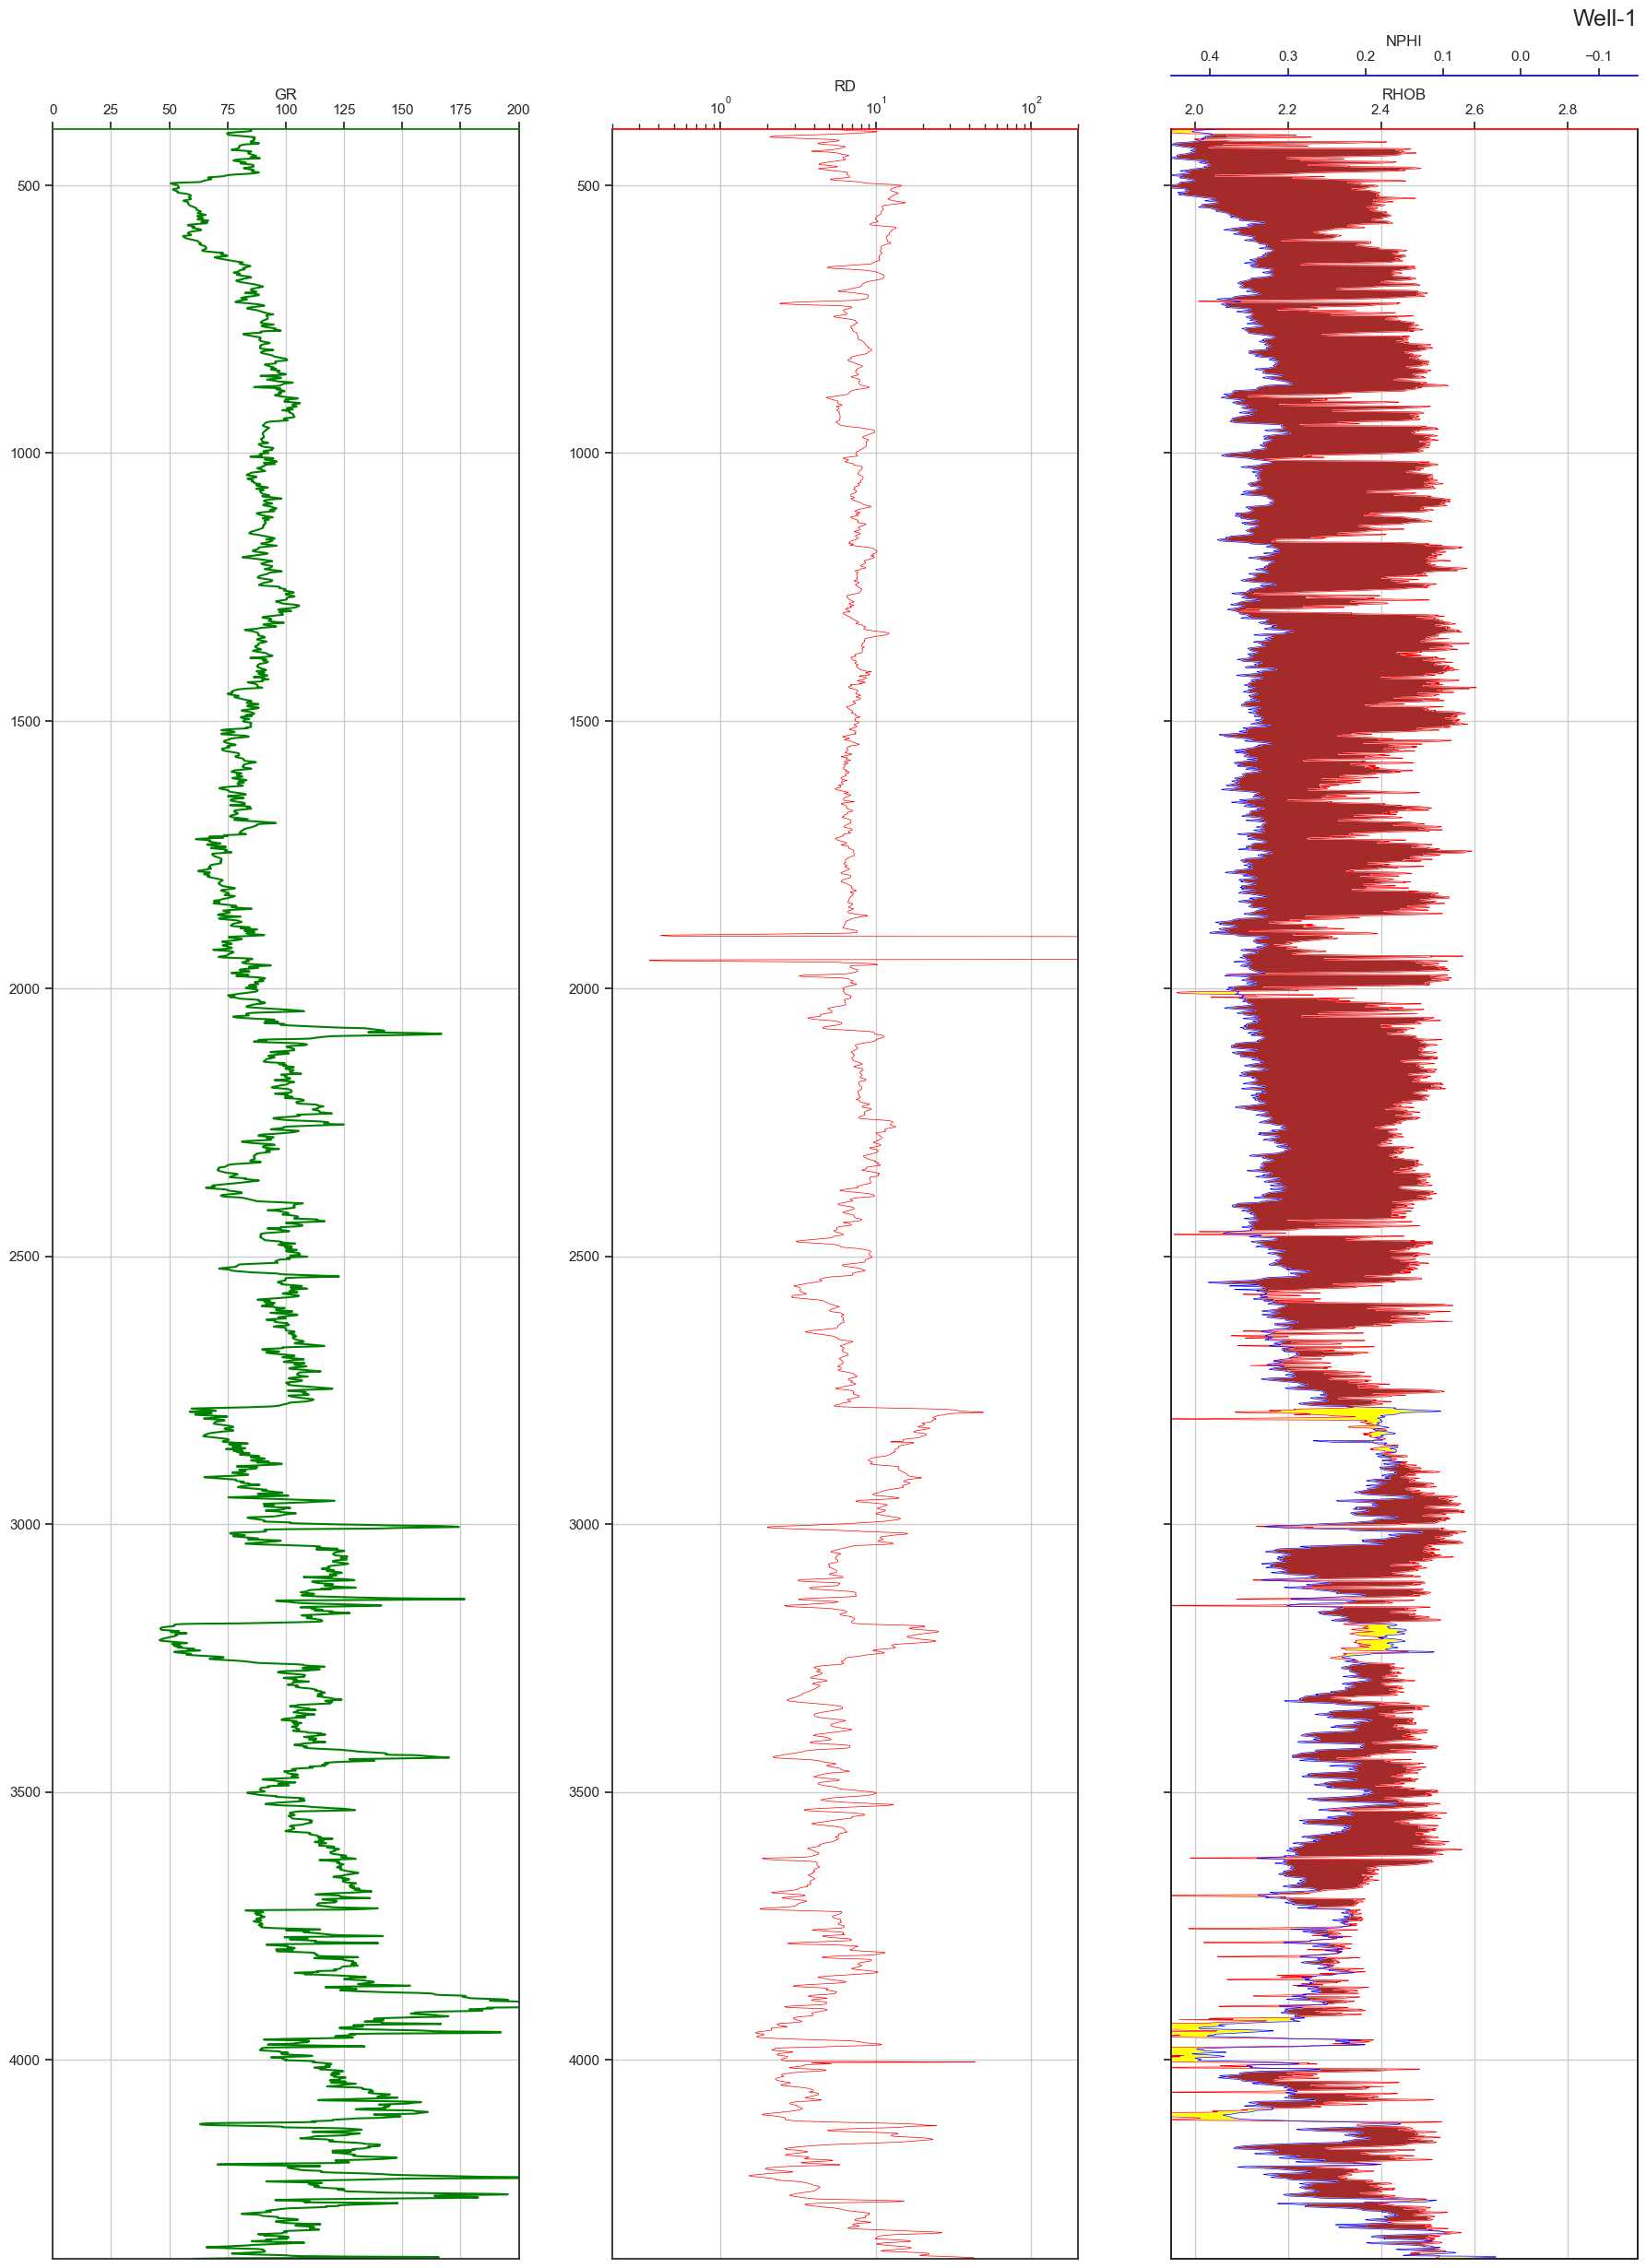

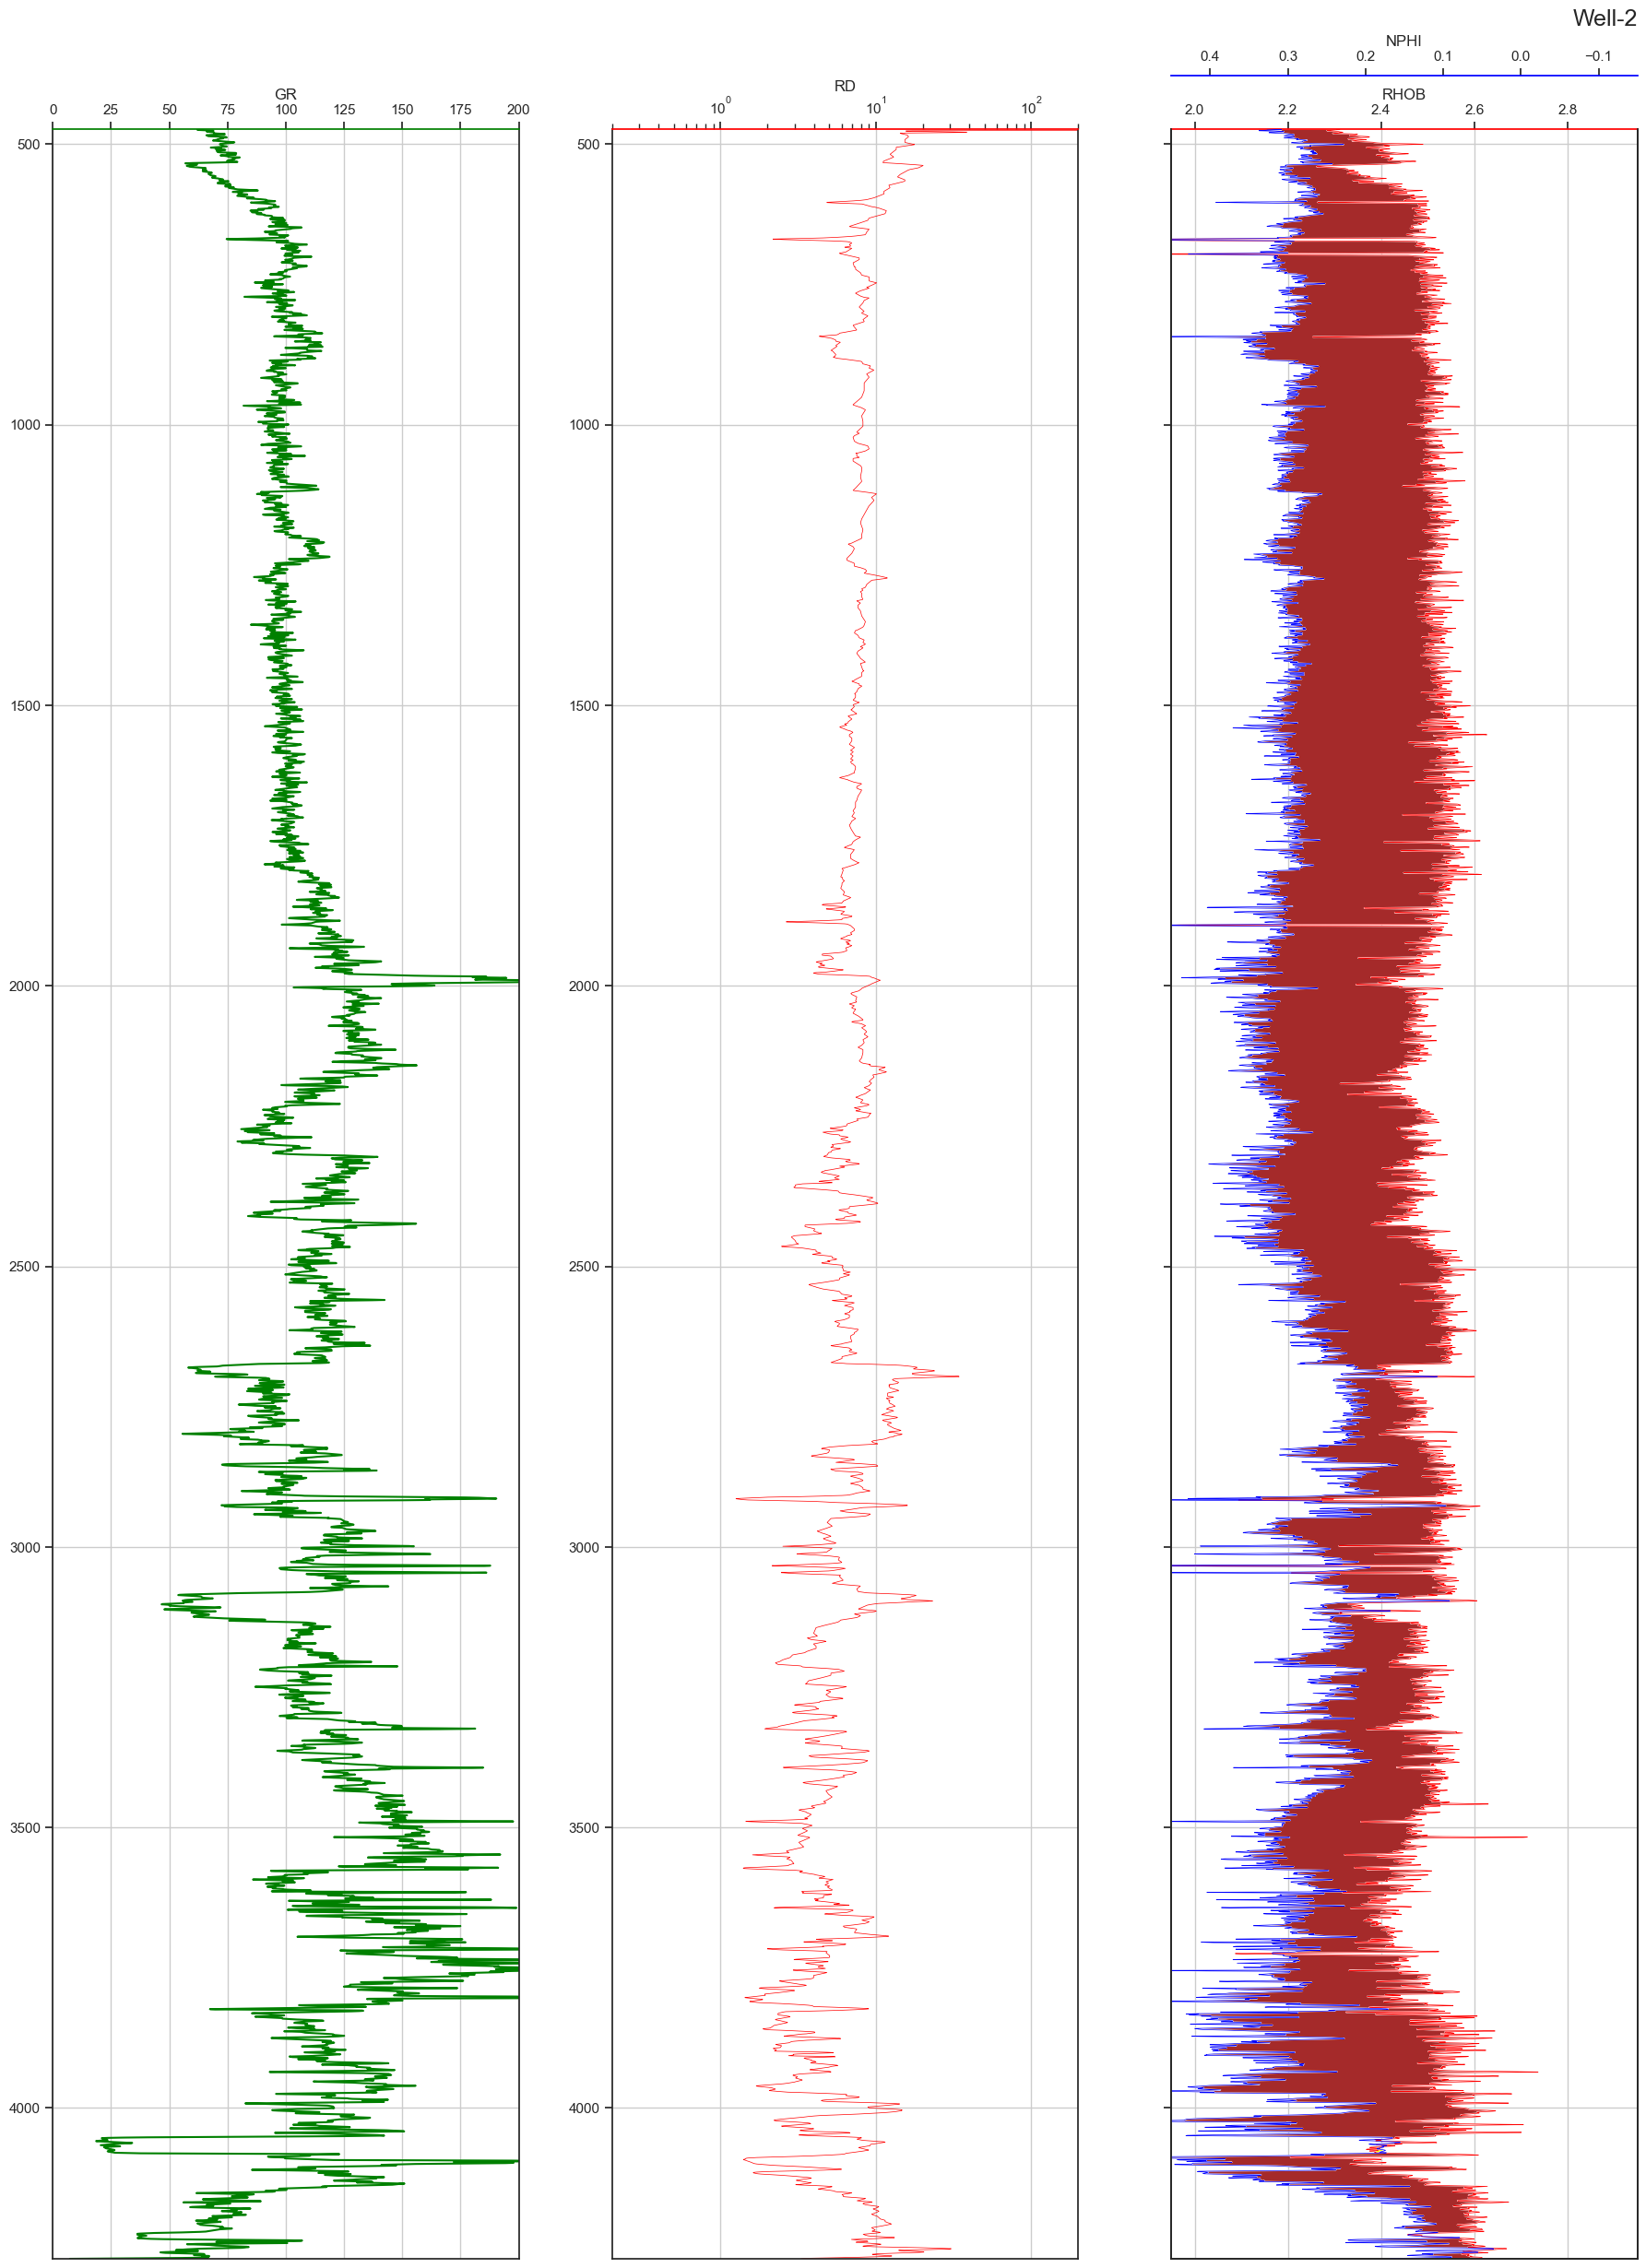

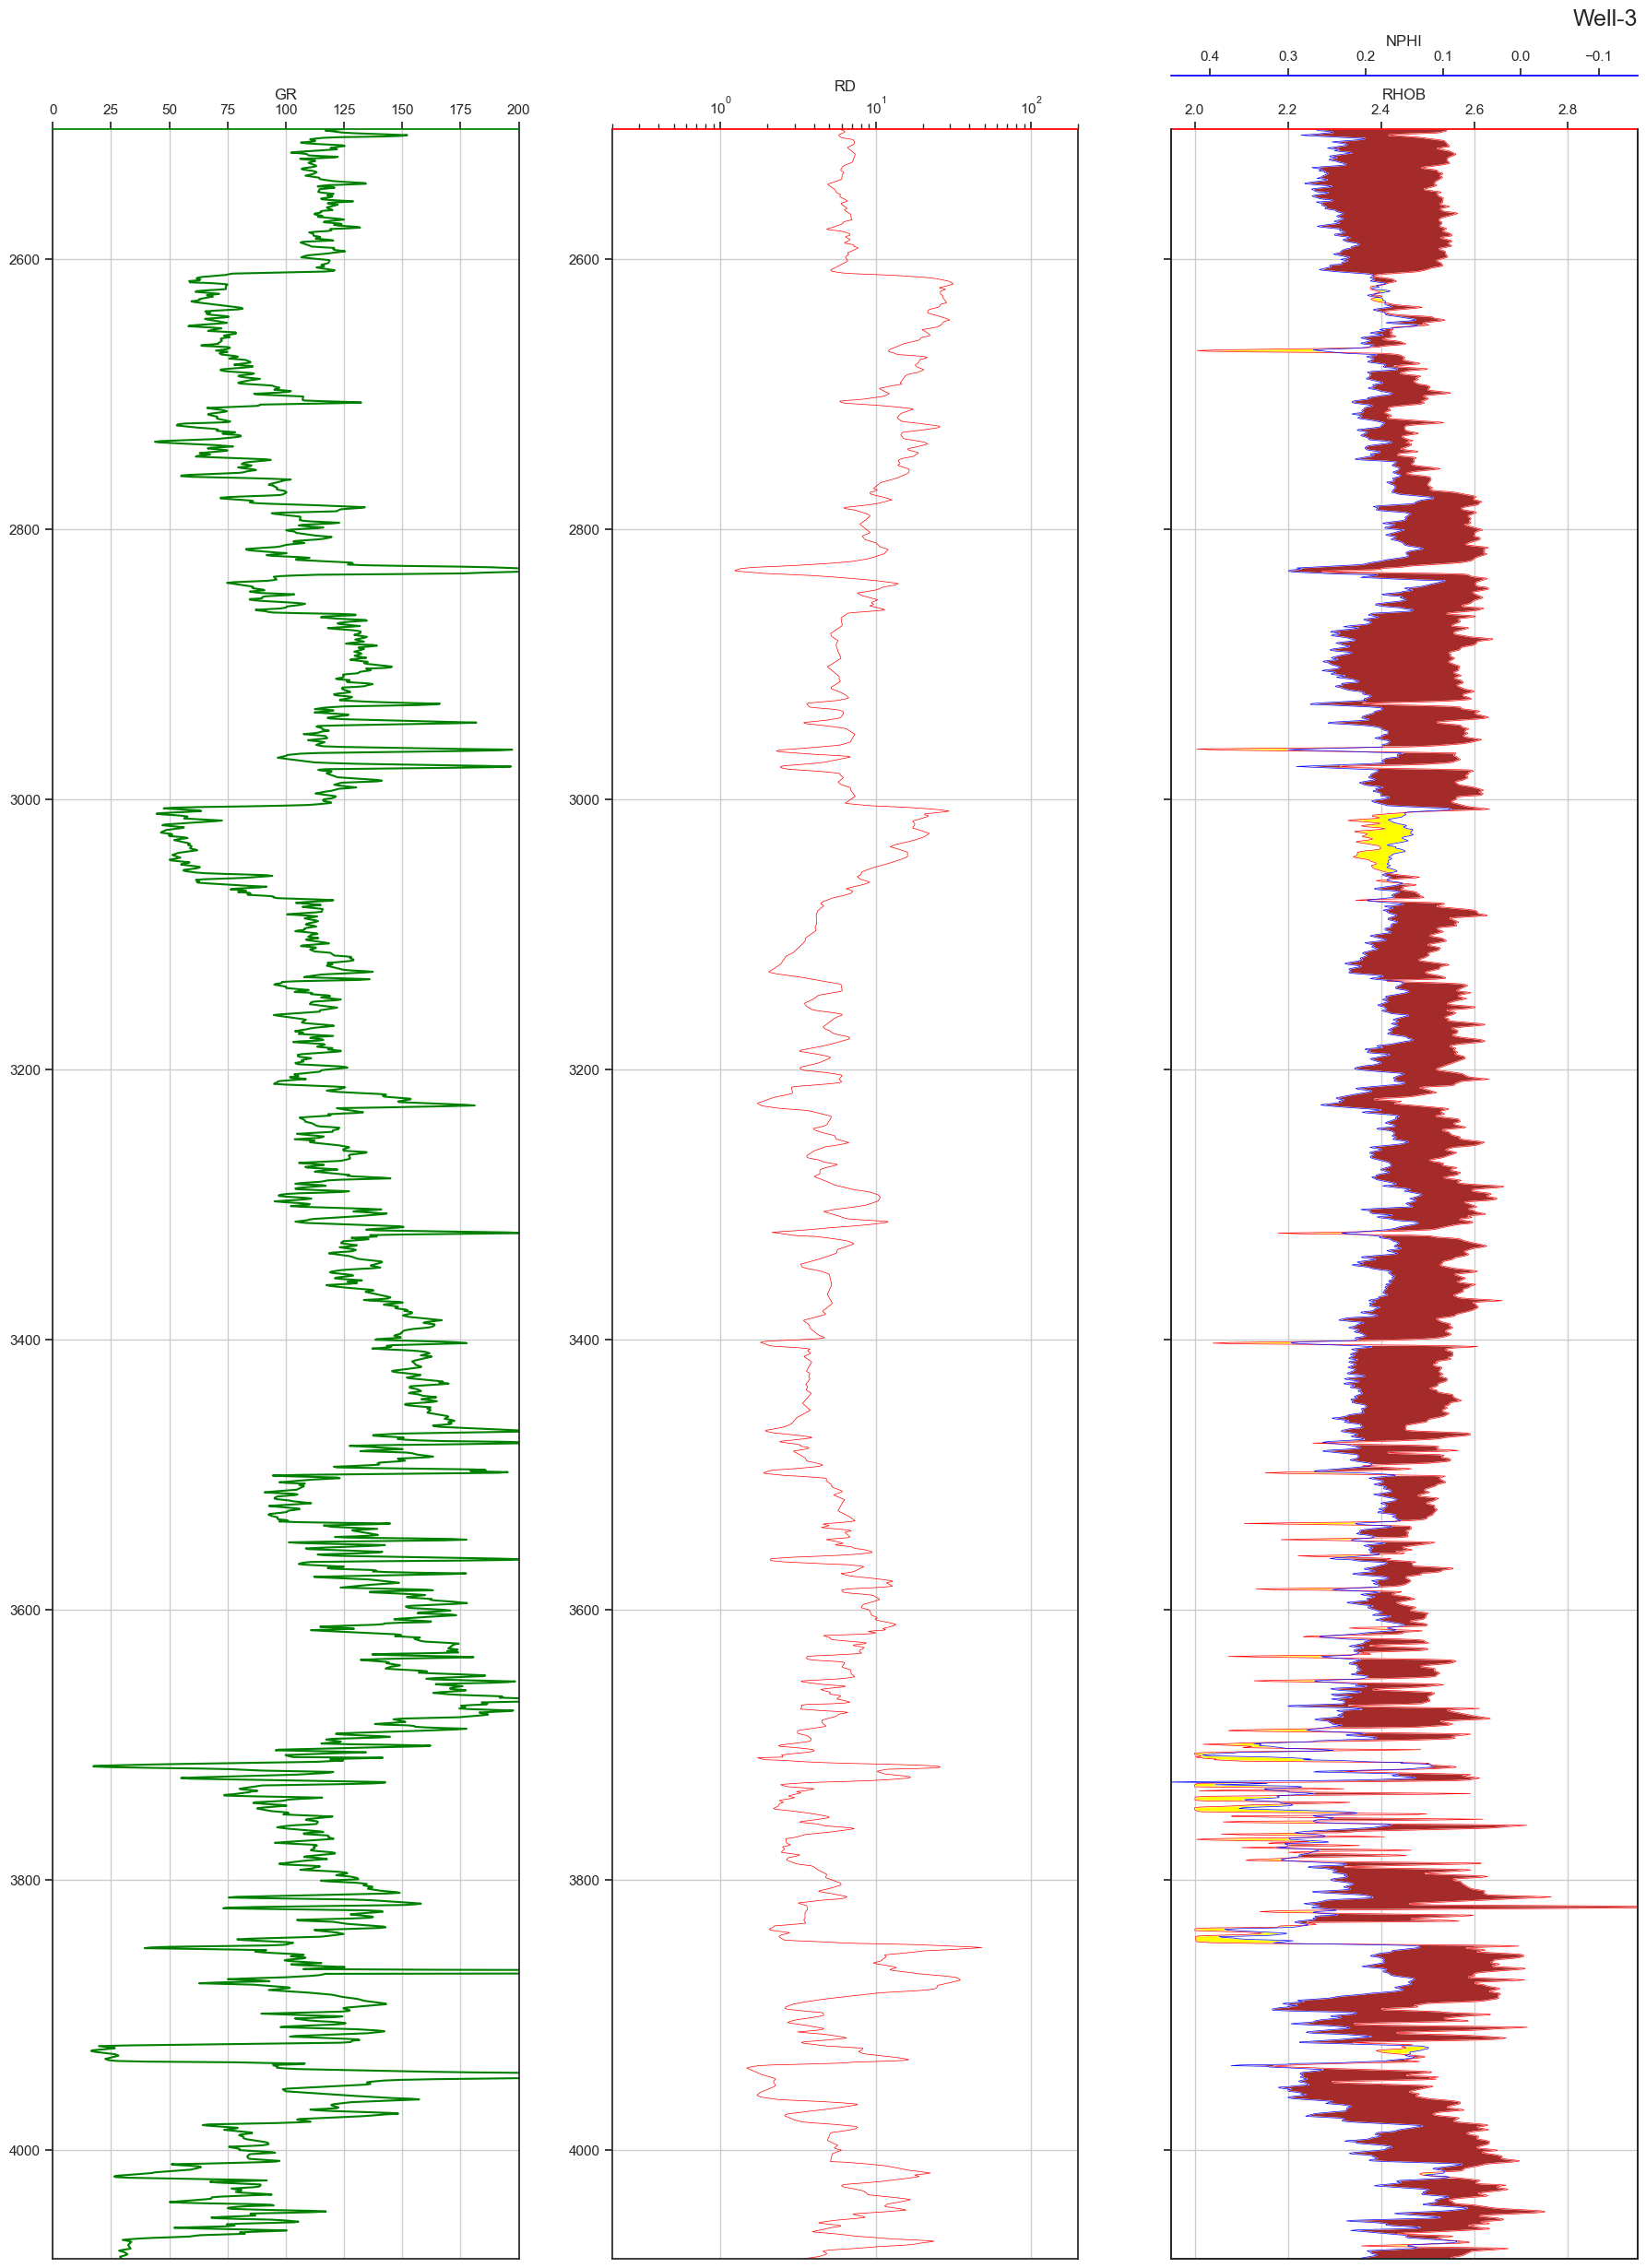

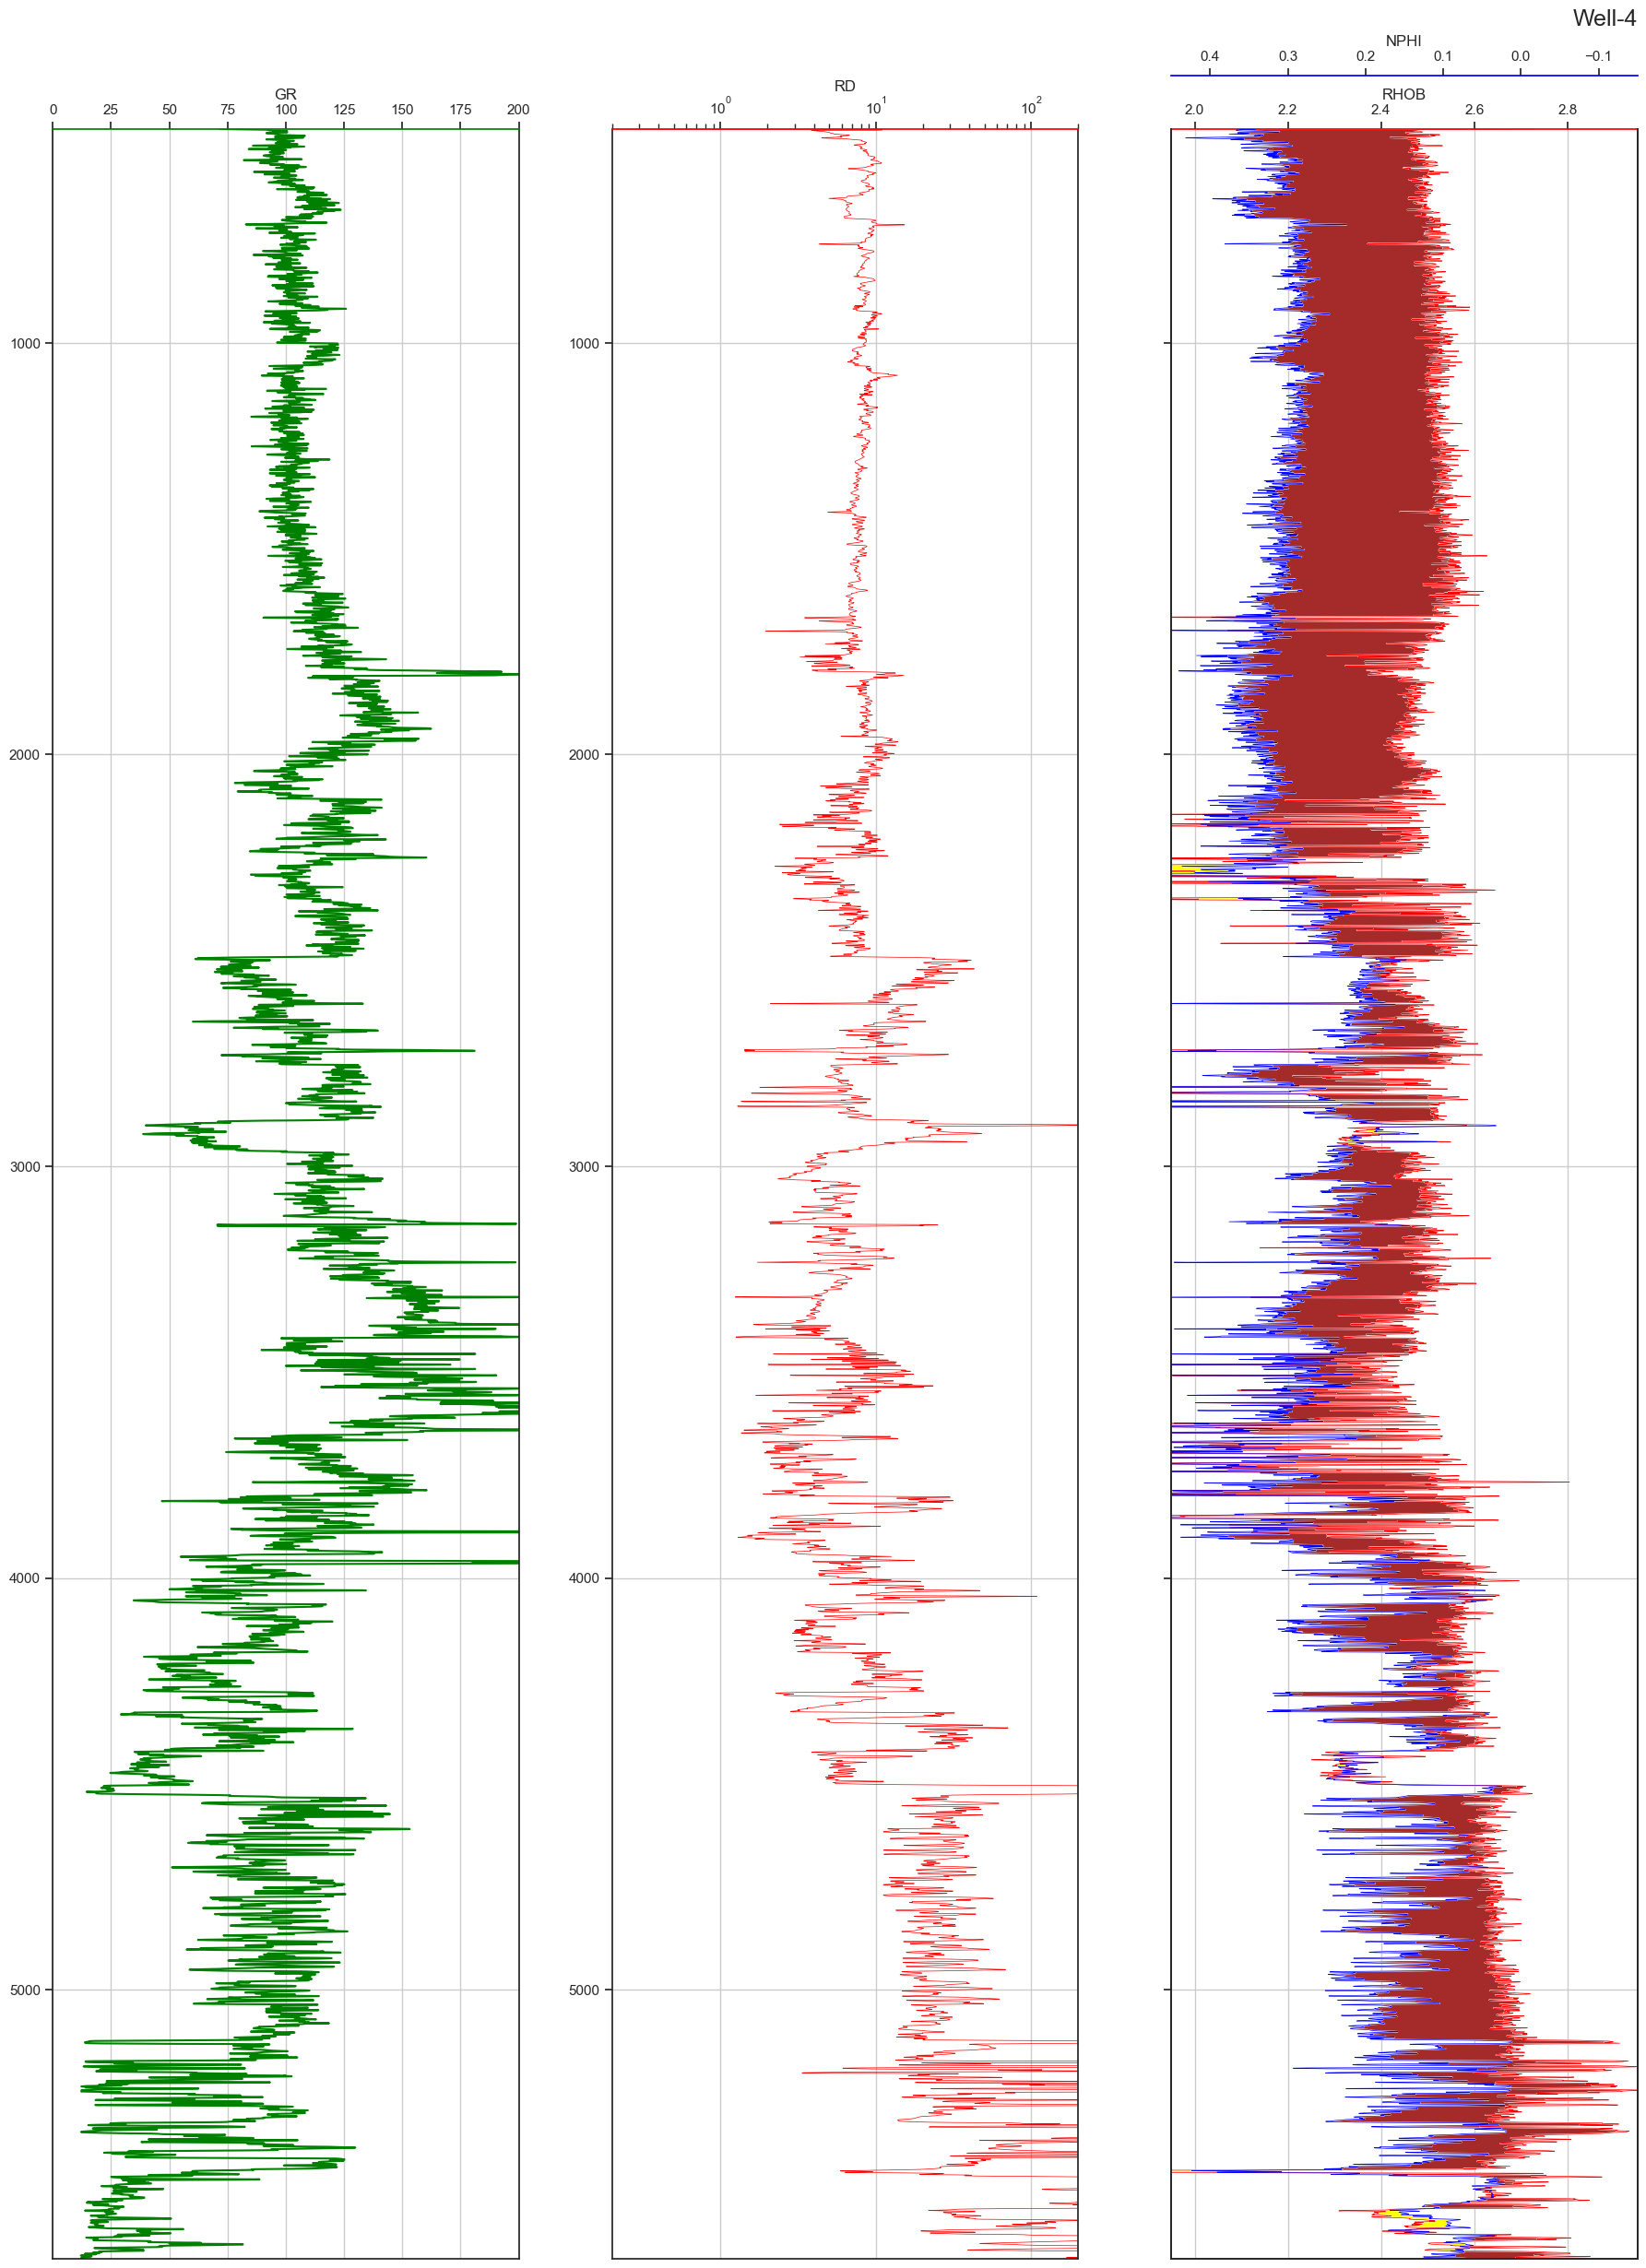

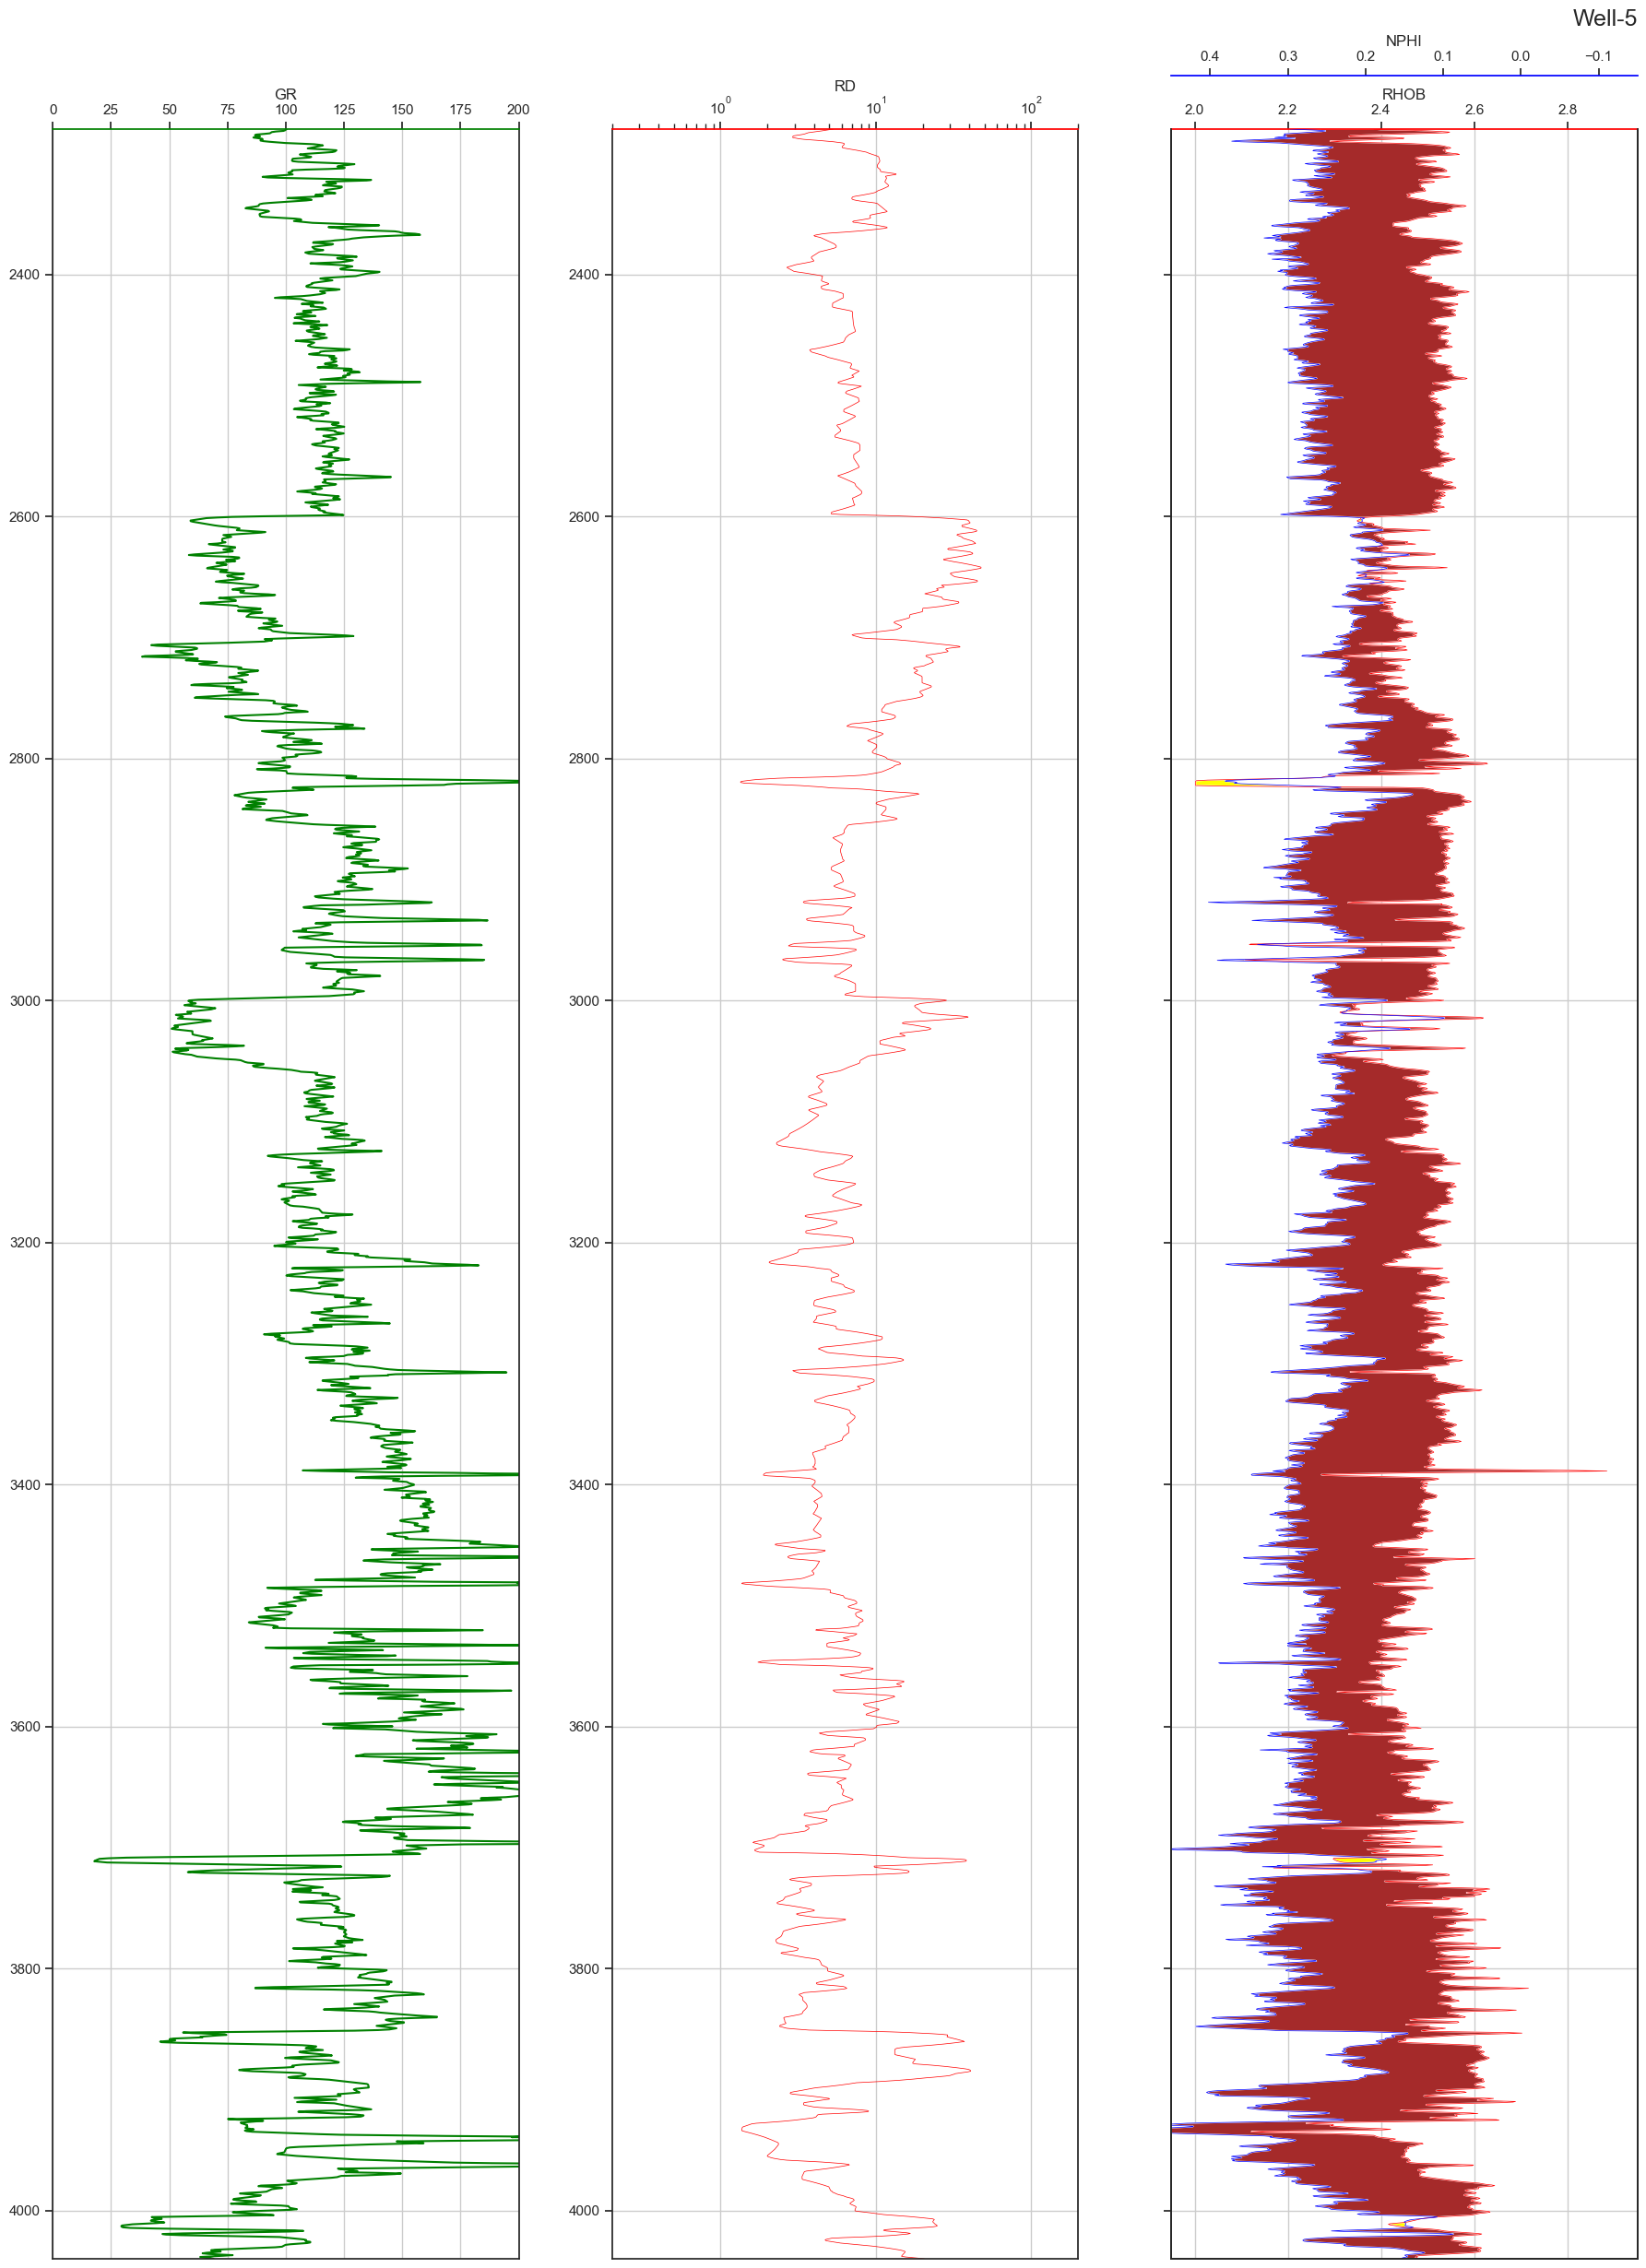

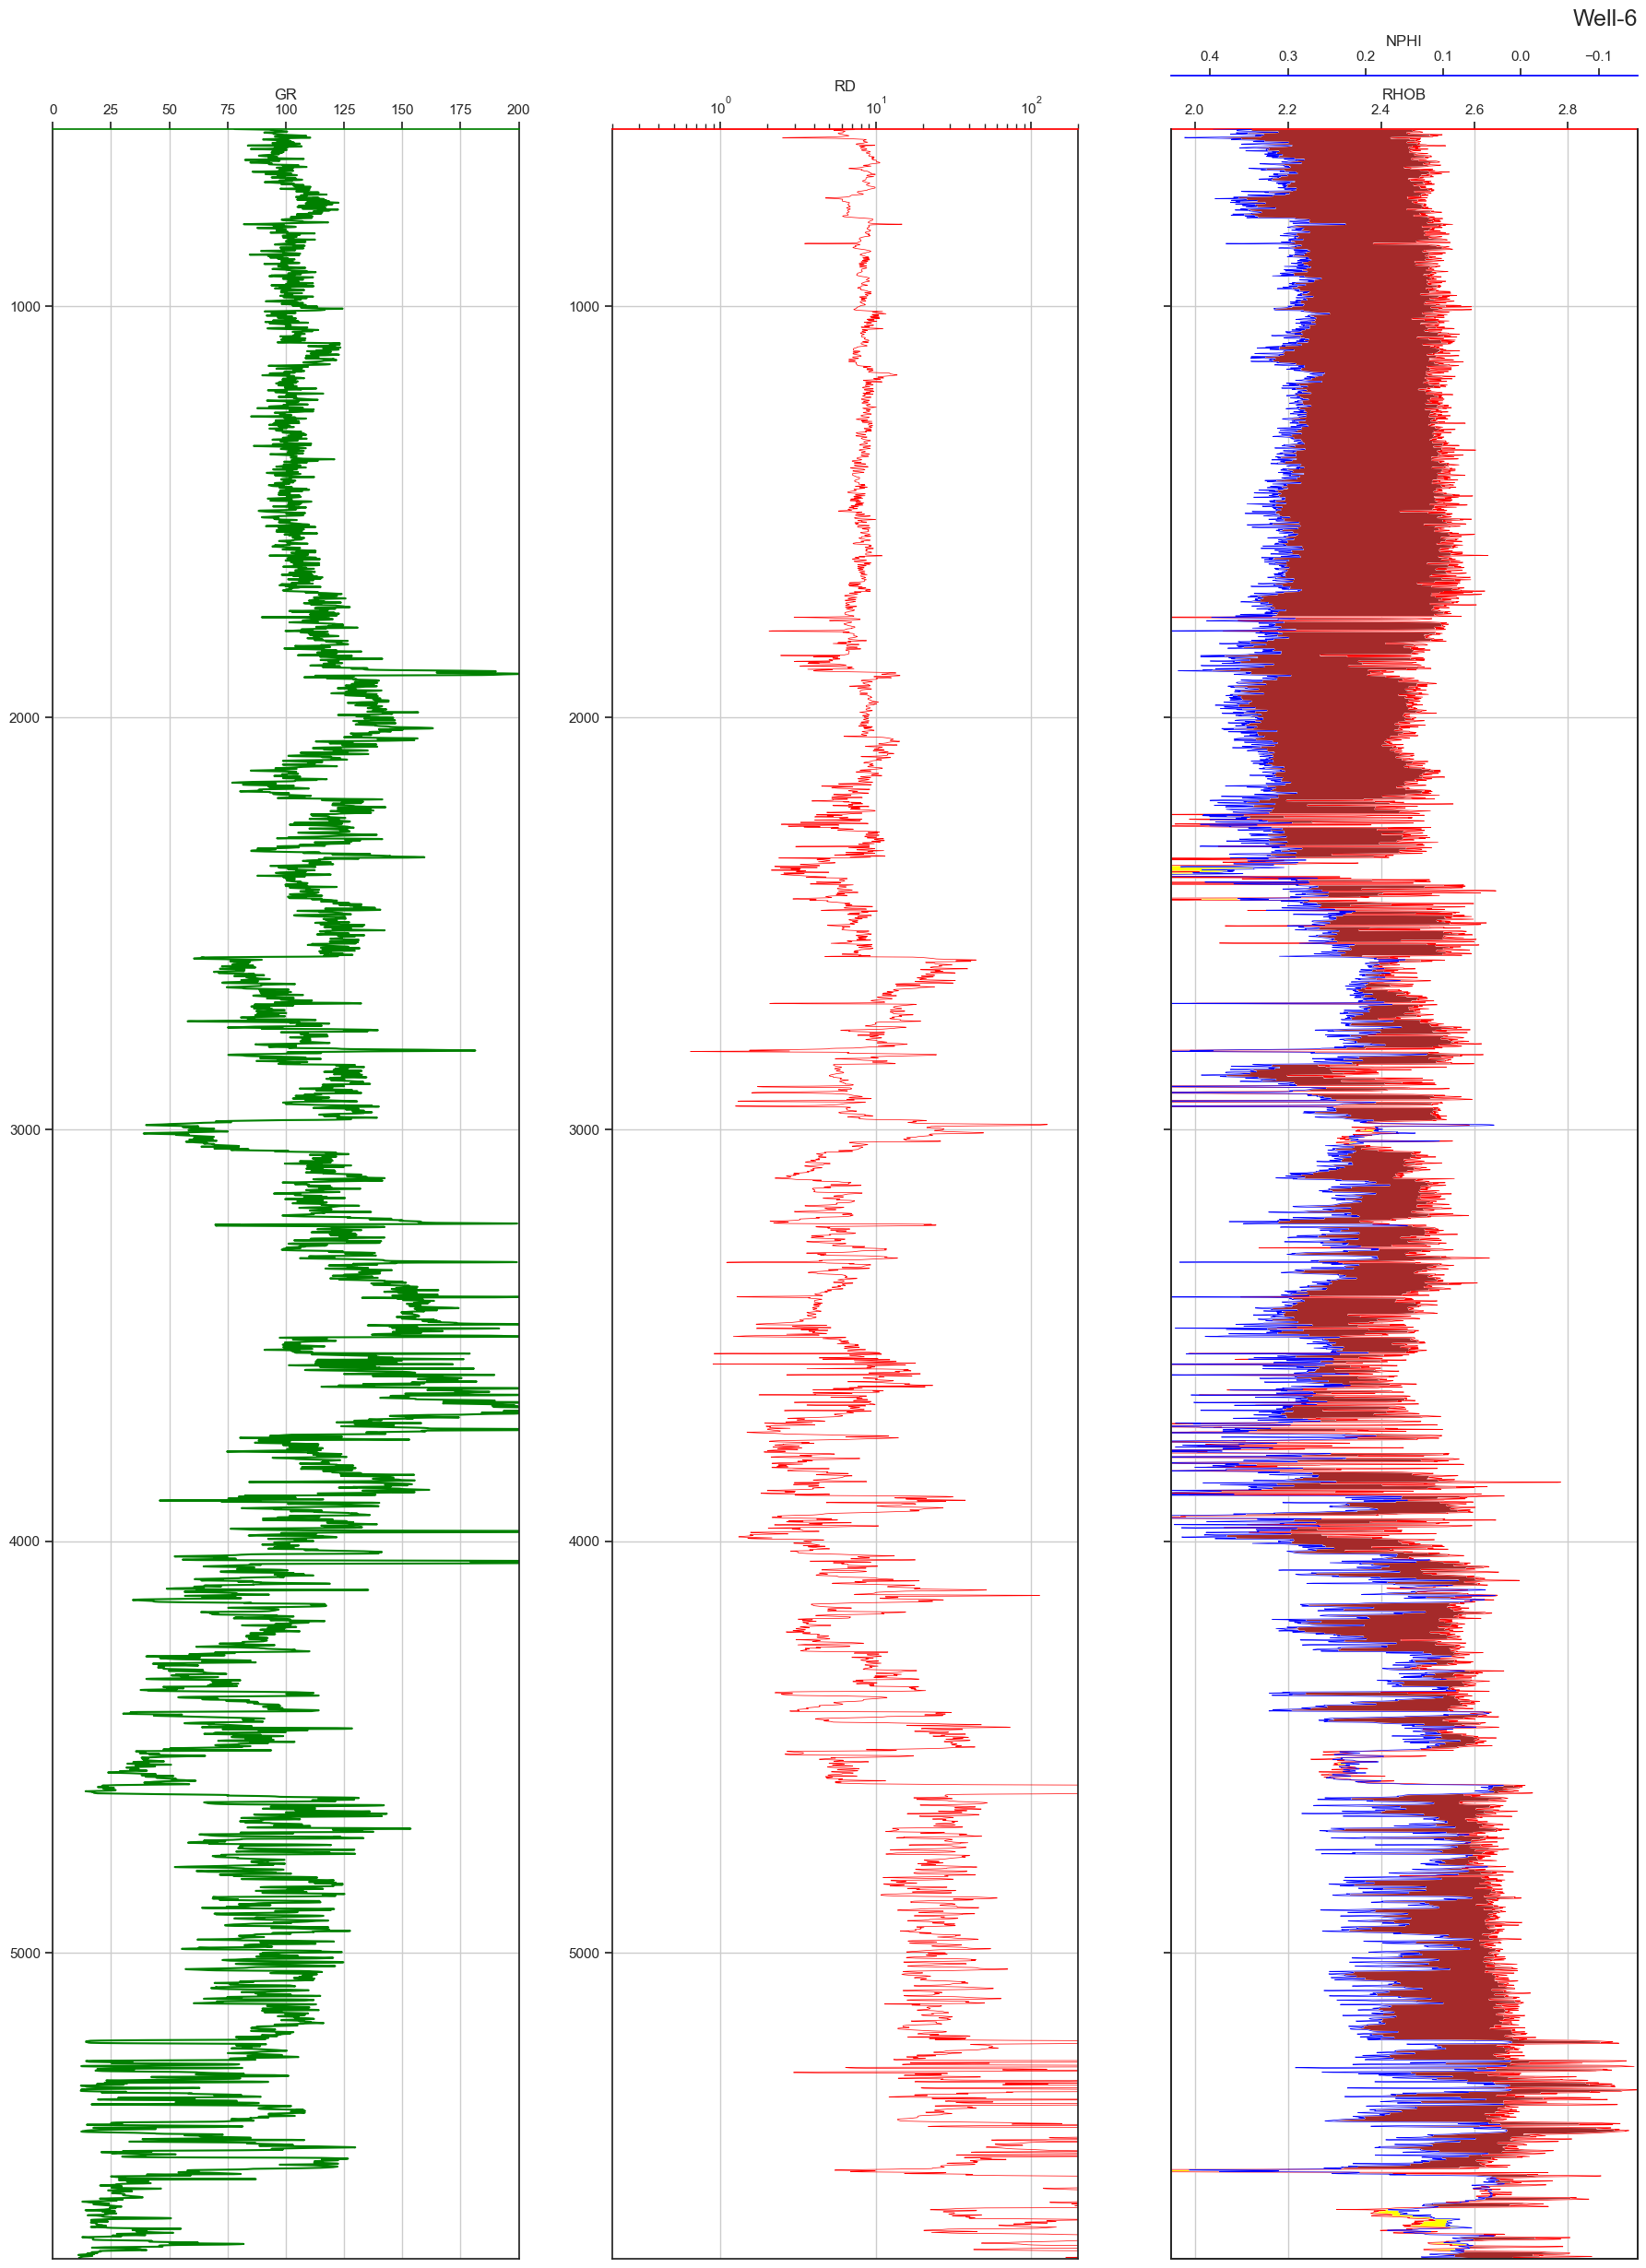

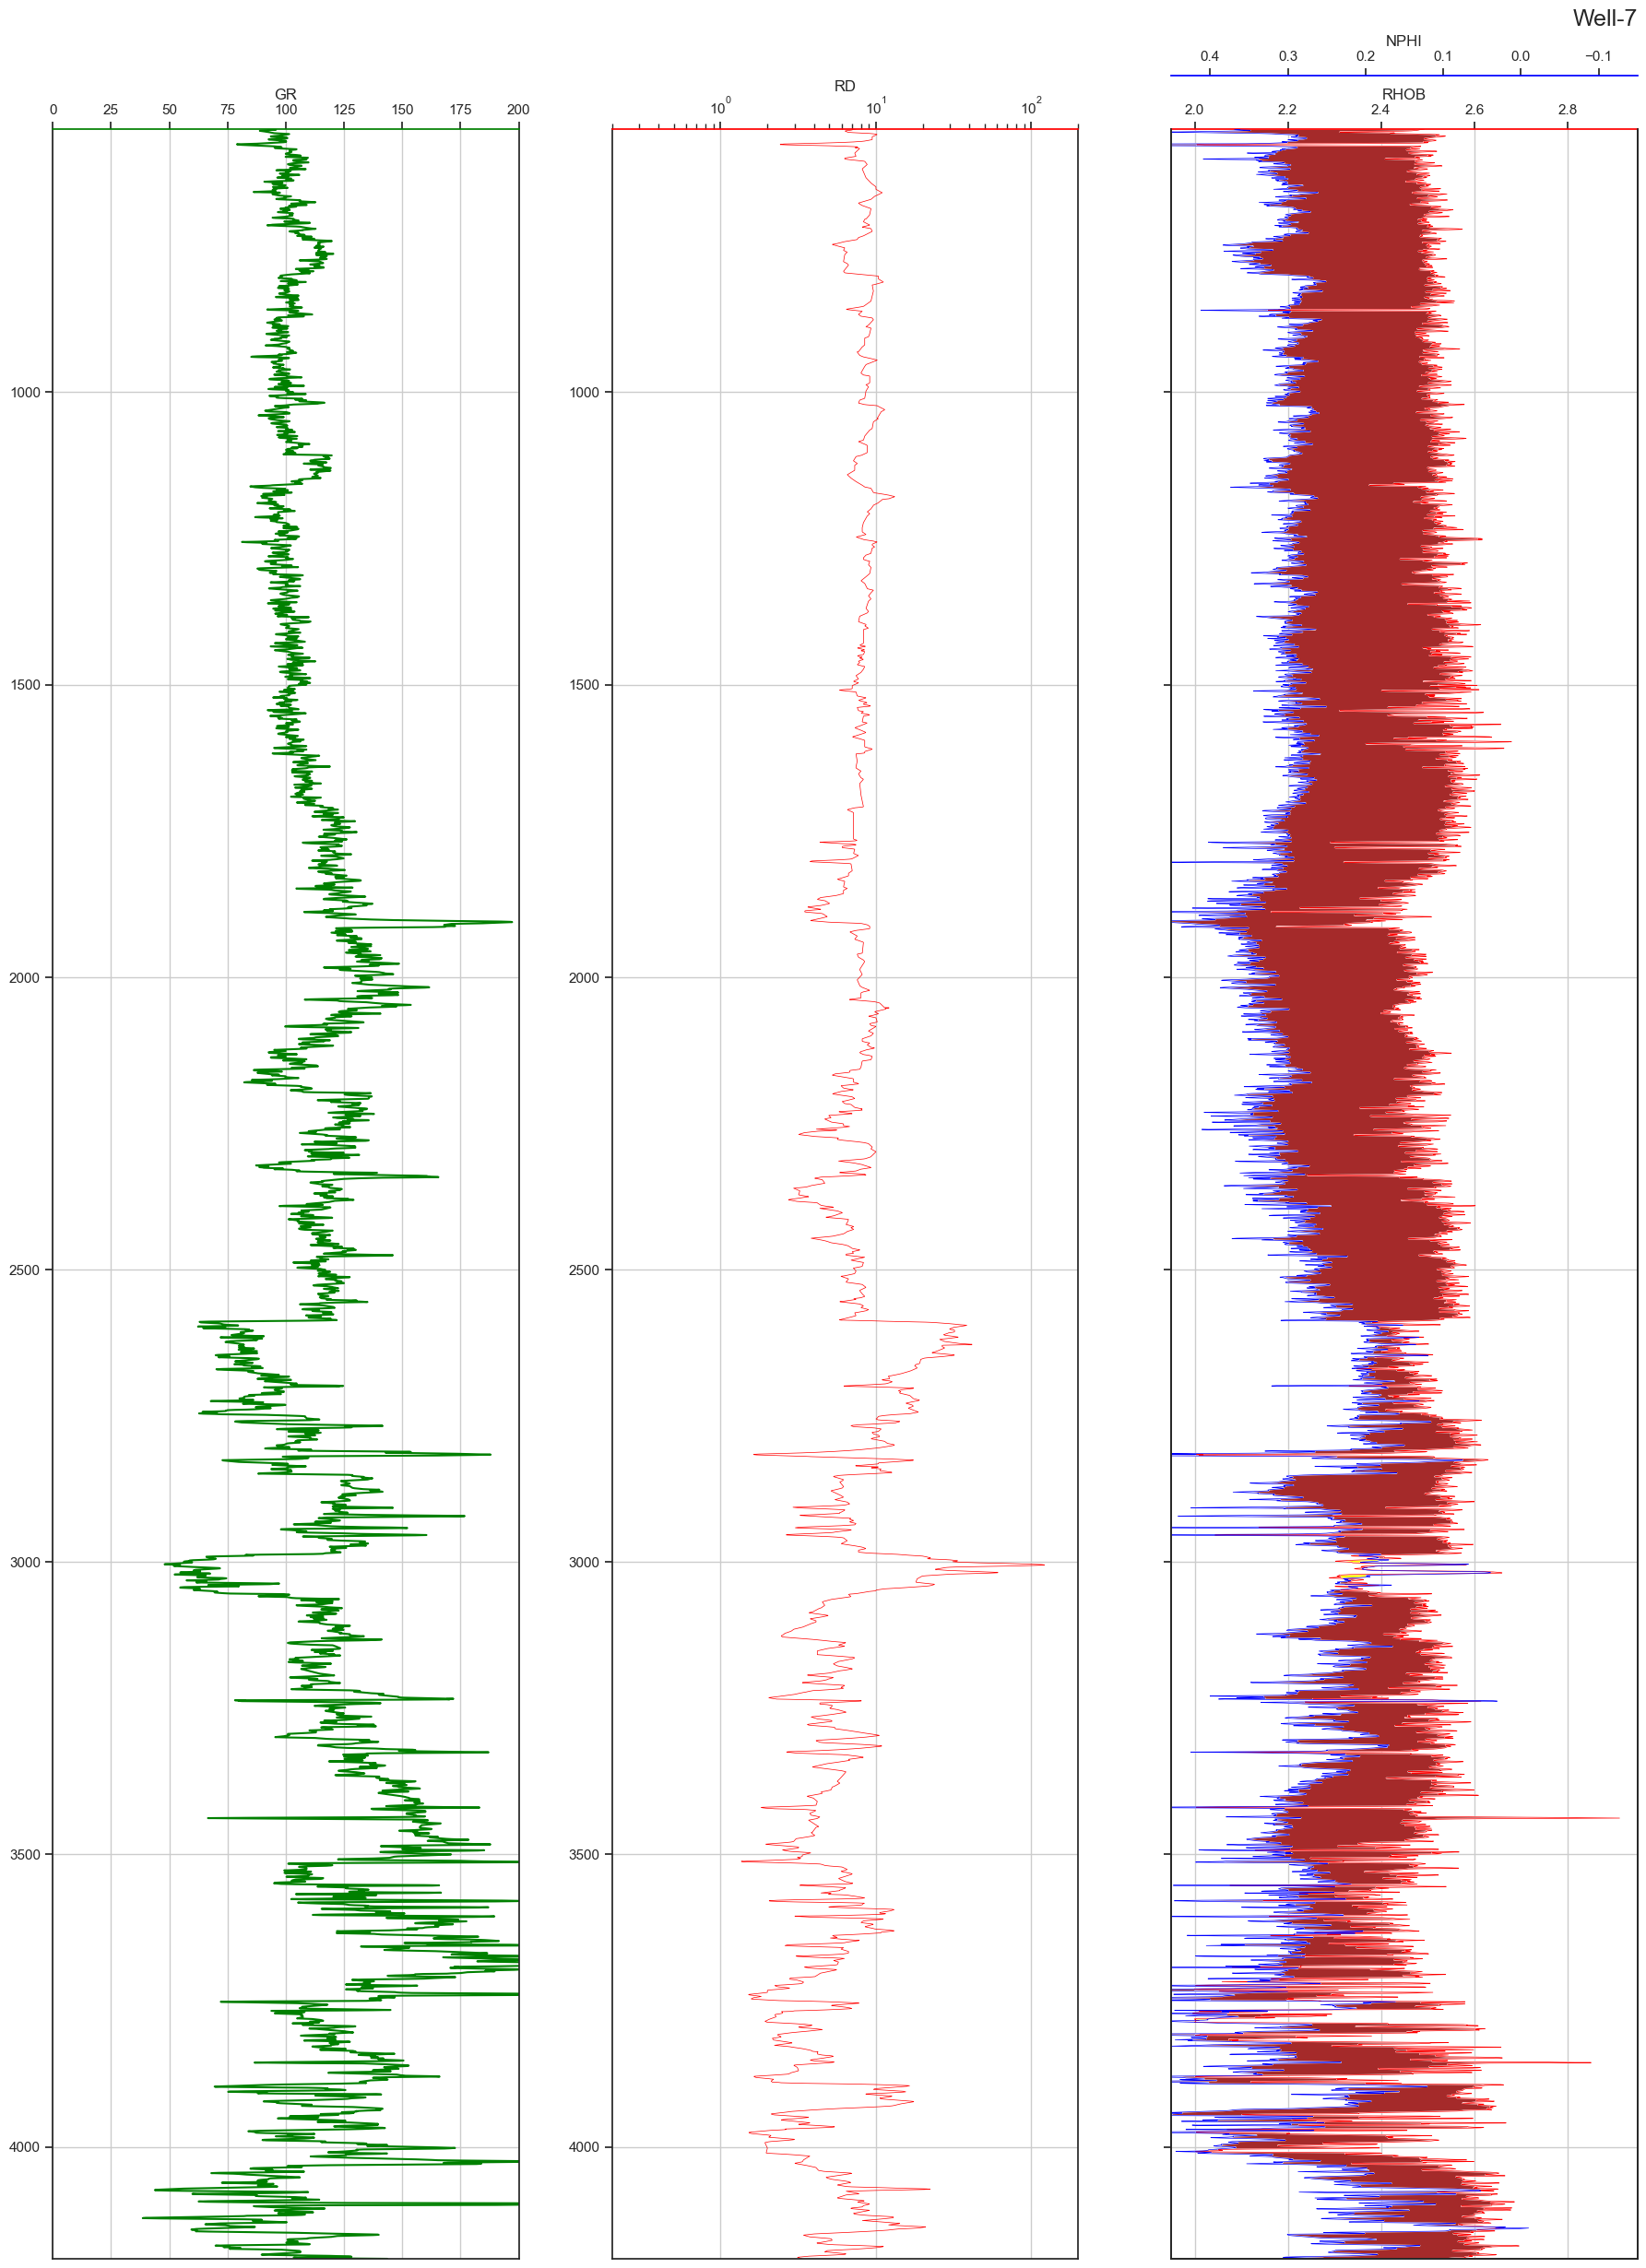

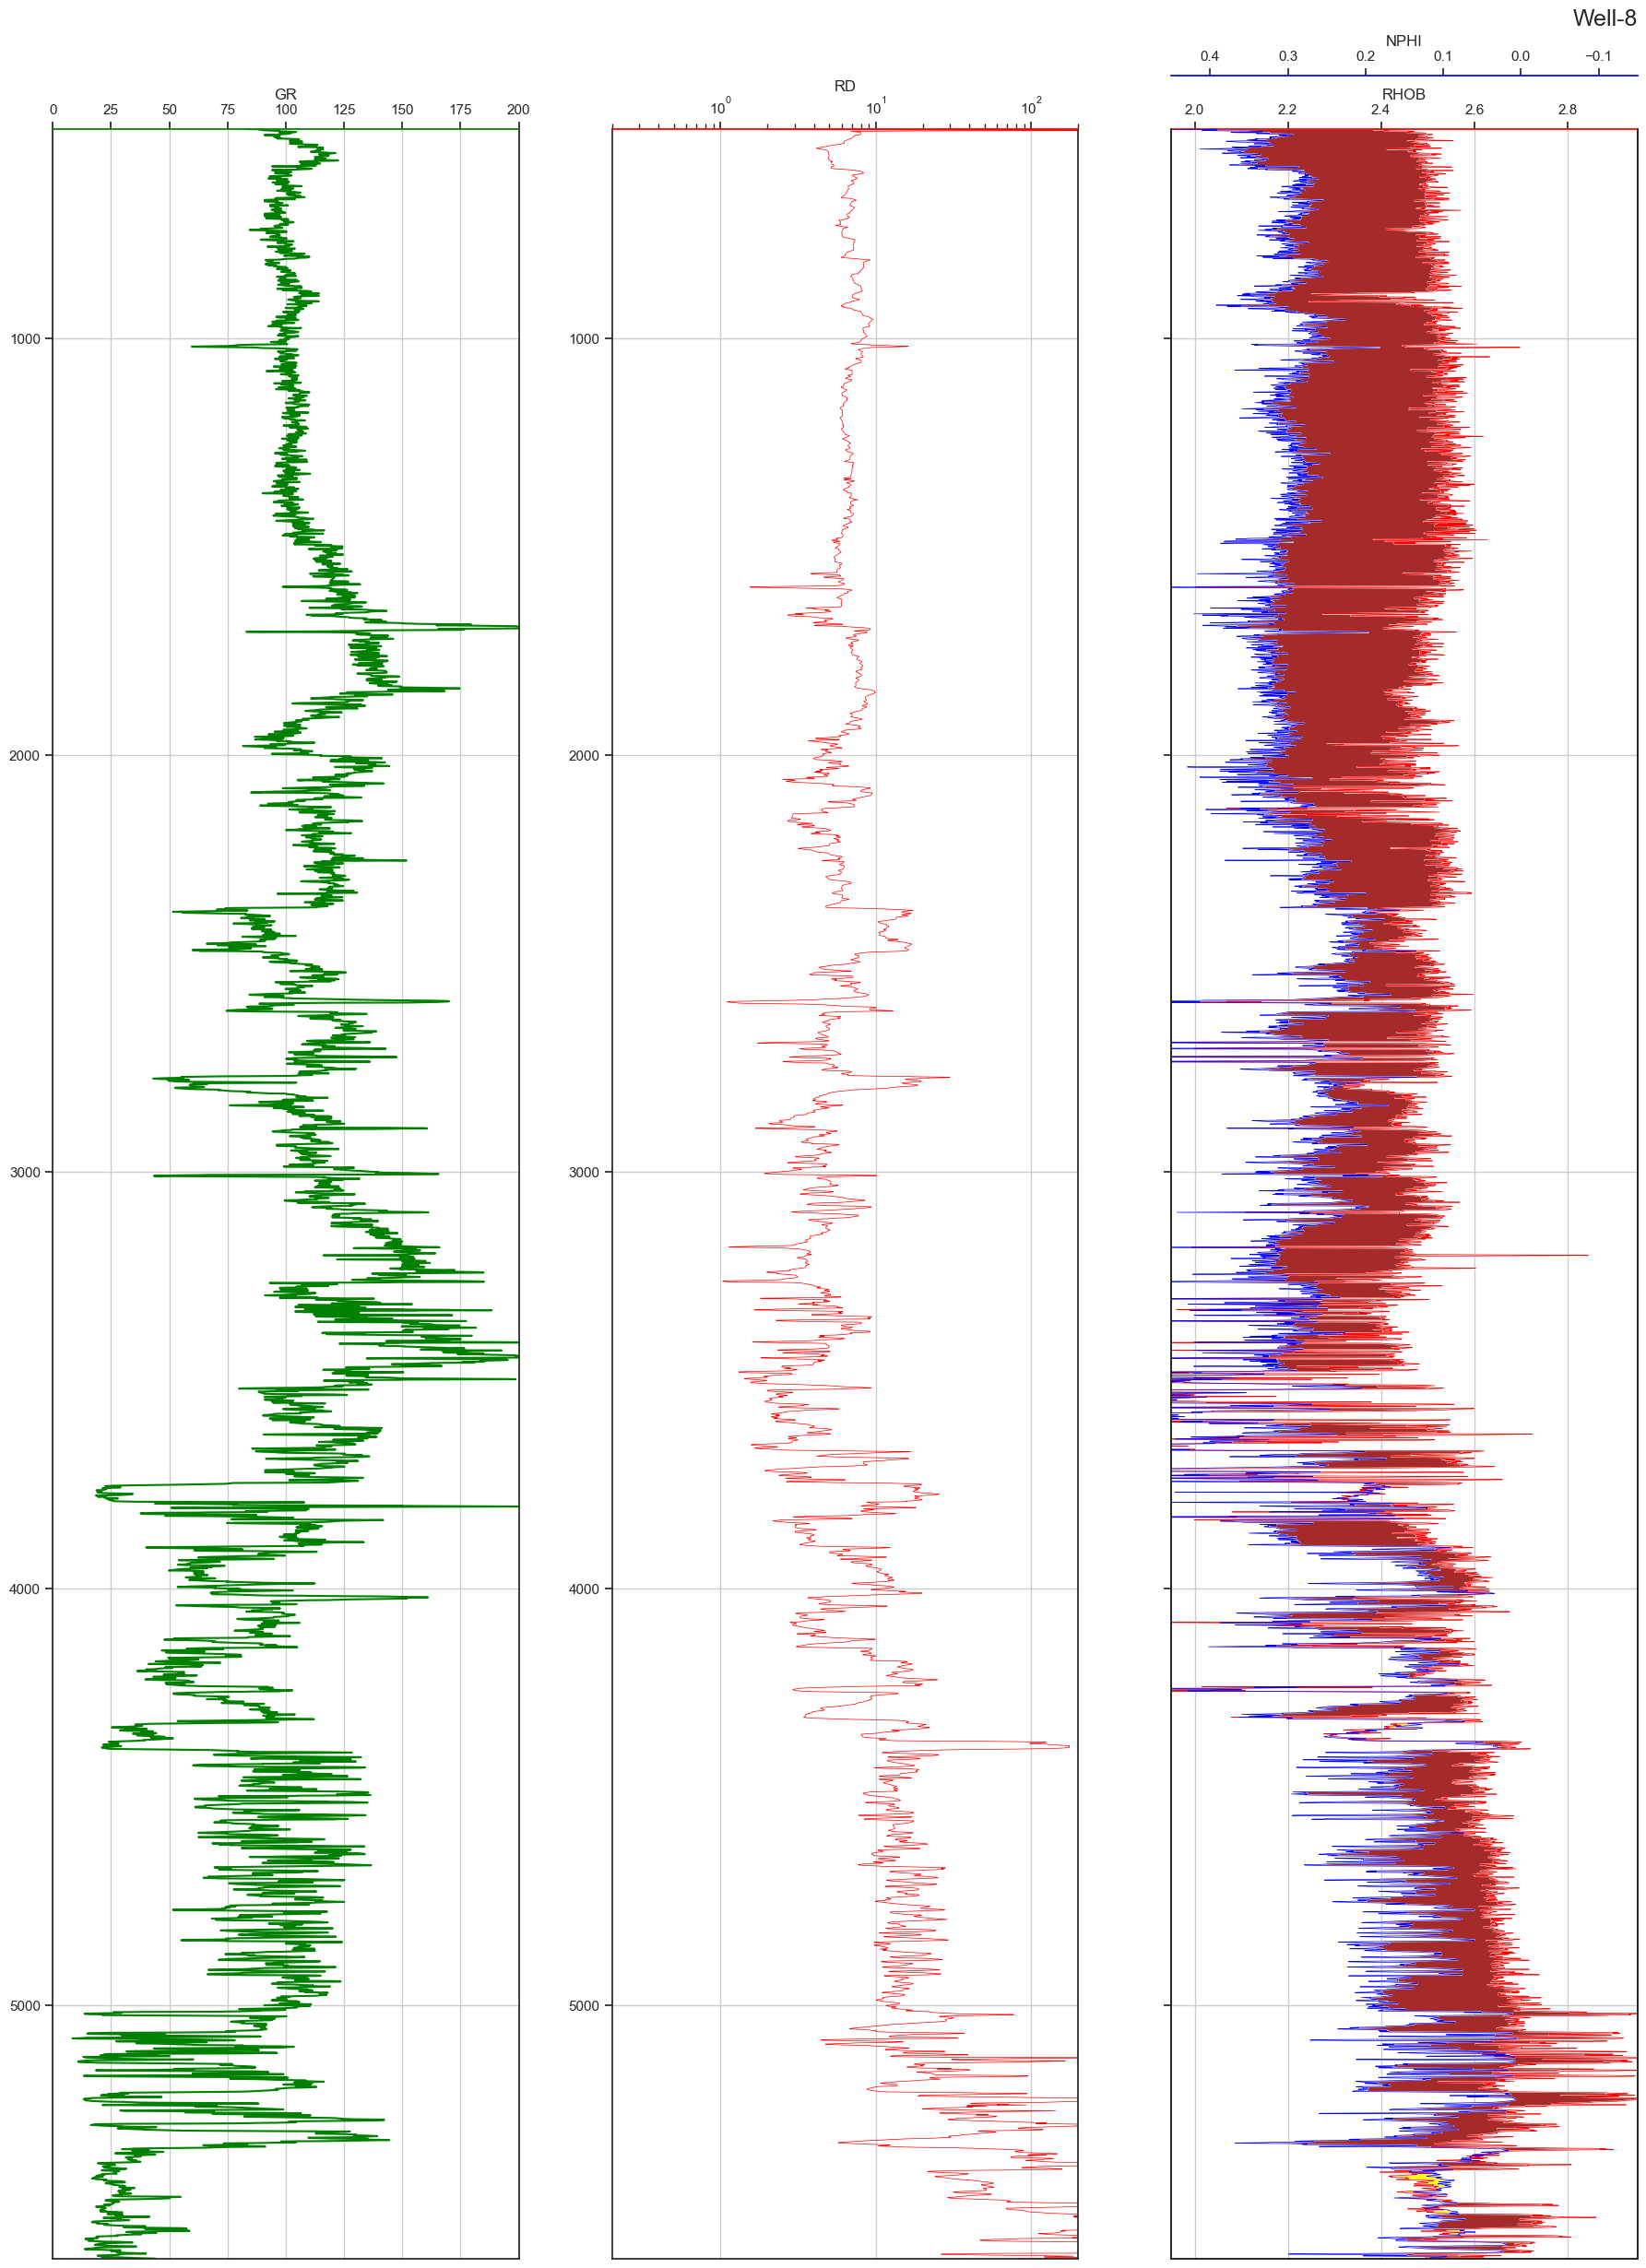

In [43]:
top = []
bot = []
for i in range(9):
    top.append(df[i].DEPT.iloc[0])
    bot.append(df[i].DEPT.iloc[-1])
    log_plot(i, df[i], top[i], bot[i])